# 1η Εργασία Τεχνικές Εξόρυξης Δεδομένων

**Στεβής Χαράλαμπος - Αντώνιος sdi1600278**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Πρώτο Κομμάτι Εργασίας. Ερωτήσεις 1-11

Διαβάζουμε αρχικά τα αρχεία με το path τους
Για τα κενά έχουμε την συνθληκη ότι κάνουμε drop το row

In [ ]:
import pandas as pd
import datetime

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
path_IMDb_movies = '/content/gdrive/MyDrive/TEDE/ask1/IMDb movies.csv'
path_IMDb_ratings = '/content/gdrive/MyDrive/TEDE/ask1/IMDb ratings.csv'
df_netflix = pd.read_csv(path_netflix)
df_IMDb_movies = pd.read_csv(path_IMDb_movies)
df_IMDb_ratings = pd.read_csv(path_IMDb_ratings)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**1. Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές ;**

Από το column με όνομα type μετράμε πόσες φορές εμφανίζονται το Movie και το TV Show . Στην συνέχεια εκτυπώνουμε αυτό που έχει εμφανιστεί τις περισσότερες φορές. Κάνουμε διάγραμμα για τις εμφανίσεις του κάθε type.

Movie


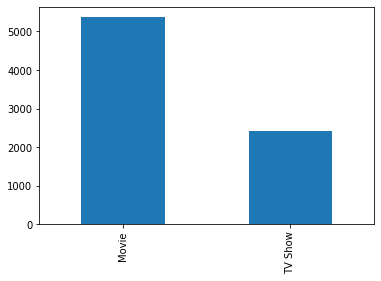

In [ ]:
# 1. Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές ;

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

print(df_netflix['type'].value_counts().idxmax())
df_netflix['type'].value_counts().plot(kind='bar')


**2. Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές;**

Φτιάχνουμε σε μόρφή date την στήλη date_added και στην συνέχεια κρατάμε μόνο τα years και τα βάζουμε σε λίστα. Μετά για κάθε χρόνο βλέπουμε αν οι ταινίες ή οι σειρές εμφανίζονται περισσότερο και εκτυπώνουμε το αποτέλεσμα.

In [ ]:
# 2. Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές;  
path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['date_added'], inplace=True)

#allazoume thn morfh tou date_added gia na mporei na diabastei kai kratame mono to year se neo column
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])
df_netflix['year'] = df_netflix['date_added'].dt.year

#ena boolean gia ta Movies kai ta shows kai ta unique years
movie = df_netflix['type'] == 'Movie'
serie = df_netflix['type'] == 'TV Show'
year_list = df_netflix['year'].unique()


# Gia kathe xrono metra ta movies kai ta shows , opoia einai perissotera ektupwse ta
for year in year_list:
  year_o = df_netflix['year'] == year
  movies = df_netflix[movie & year_o].count()
  series = df_netflix[serie & year_o].count()
  if movies['type'] > series['type'] :
    print("Netflix invested more on Movies (" ,movies['type'] ,")  in ", year )
  else:
    print("Netflix invested more on Shows (" ,series['type'] ,")  in ", year )

Netflix invested more on Movies ( 1312 )  in  2020
Netflix invested more on Movies ( 258 )  in  2016
Netflix invested more on Movies ( 1255 )  in  2018
Netflix invested more on Movies ( 864 )  in  2017
Netflix invested more on Movies ( 1497 )  in  2019
Netflix invested more on Movies ( 88 )  in  2021
Netflix invested more on Movies ( 58 )  in  2015
Netflix invested more on Movies ( 6 )  in  2013
Netflix invested more on Movies ( 13 )  in  2011
Netflix invested more on Movies ( 3 )  in  2012
Netflix invested more on Movies ( 19 )  in  2014
Netflix invested more on Shows ( 1 )  in  2008
Netflix invested more on Movies ( 2 )  in  2009
Netflix invested more on Movies ( 1 )  in  2010


**3. Ποιά χώρα έχει το περισσότερο περιεχόμενο;**
Παίρνουμς τα columns country,show_id και τα βάζουμε σε νέο dataframe. Επειδή κάποια κελιά έχουν παραπάνω από μία χώρα προσπαθούμε να τα χωρίσουμε ( την τακτική αυτή ακολουθούμε και σε άλλα ερωτήματα οπότε θα εξηγηθεί μια μόνο φορά εδώ).
Ουσιαστικά όπου βρίσκει κόμμα, ή κενό κόμμα κόβει το cell σε δύο νέα cell και τους βάζει σαν index το show_id . Κάνουμε reset το index και ονομάζουμε τα columns. Ύστερα απλώς μετράμε πόσες φορές εμφανίζεται κάθε χώρα.

In [ ]:
# 3. Ποιά χώρα έχει το περισσότερο περιεχόμενο;

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['country'], inplace=True)
df_netflix.dropna(subset = ['show_id'], inplace=True)

#spase ta kelia pou uparxoun 2+ xwres
countries_df = pd.DataFrame(df_netflix.country.str.replace(', ',',').str.split(',').tolist(), index=df_netflix.show_id).stack()

# kane reset ta ids sta nea rows
countries_df = countries_df.reset_index([0, 'show_id'])

# ftiakse to table
countries_df.columns = ['show_id','country']

#print to table
countries_df.country.value_counts()


United States     3297
India              990
United Kingdom     723
Canada             412
France             349
                  ... 
Sri Lanka            1
East Germany         1
Angola               1
Sudan                1
Somalia              1
Name: country, Length: 118, dtype: int64

**4. Τι είδους περιεχόμενο έχει κάθε χώρα;**

Παίρνουμε σε νέο dataframe τα columns country,listed_in. Χωρίζουμε και καθαρίζουμε ώστε σε κάθε row να υπάρχει μόνο μια χώρα και μόνο ένα genre ( ο τρόπος έχει εξηγηθεί παραπάνω ). Διώχνουμε δυπλότυπα που μπορεί να έχουν προκύψει και μετράμε πόσες φορές εμφανίζεται κάθε χώρα.

In [ ]:
#4. Τι είδους περιεχόμενο έχει κάθε χώρα;

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['country'], inplace=True)
df_netflix.dropna(subset = ['listed_in'], inplace=True)
df_netflix.dropna(subset = ['show_id'], inplace=True)

#spase ta kelia pou uparxoun 2+ xwres me bash ta listed_in
ListedNCountries_df = pd.DataFrame(df_netflix.country.str.replace(', ',',').str.split(',').tolist(), index=df_netflix.listed_in).stack()

# kane reset ta ids sta nea rows kai kolla ta me ta listed_in
ListedNCountries_df = ListedNCountries_df.reset_index([0, 'listed_in'])

# ftiakse to table
ListedNCountries_df.columns = ['listed_in','country']

#kane to idio gia ta listed_in me bash tis xwres
ListedNCountries_df = pd.DataFrame(ListedNCountries_df.listed_in.str.replace(', ',',').str.split(',').tolist(), index=ListedNCountries_df.country).stack()
ListedNCountries_df = ListedNCountries_df.reset_index([0, 'country'])


#print to table
ListedNCountries_df =ListedNCountries_df.drop_duplicates()
ListedNCountries_df.value_counts('country')

country
United States     42
Canada            37
United Kingdom    37
France            35
India             35
                  ..
Ecuador            1
Sudan              1
Bermuda            1
Botswana           1
Kazakhstan         1
Length: 118, dtype: int64

**5. Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε κάθε χώρα. Κάντε το ίδιο και για τις σειρές**
Ό,τι κάνουμε για τα Movies κάνουμε και για τα TV Show. Κάνουμε ένα νέο dataframe όπου κρατάμε μόνο τα Movies. Στο dataframe αυτό υπάρχουν countries,cast. Τα χωρίζουμε ώστε να υπάρχει σε κάθε row μία χώρα και ένας ηθοποιός. Φτίαχνουμε μια λίστα από χώρες και στην συνέχεια για κάθε χώρα φτιάχνουμε ένα διάγραμμα με τους τρεις τοπ ηθοποιούς.
Το ίδιο γίνεται και για σειρές.

*Σημείωση: Το κελί αυτό τρέχει αρκετή ώρα καθώς εκτυπώσει len_of_countries x len_of_countries γραφήματα*

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


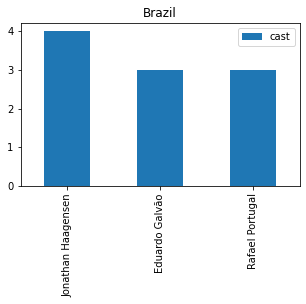

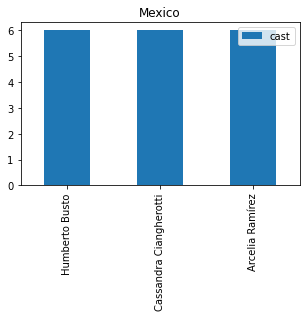

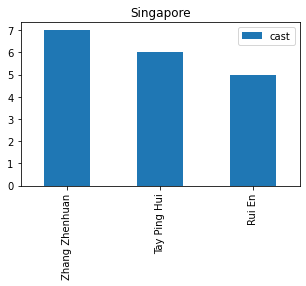

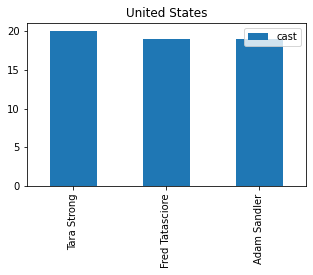

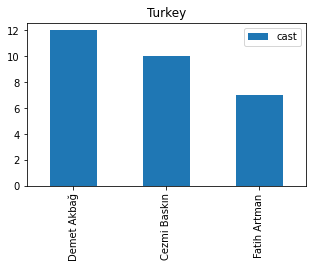

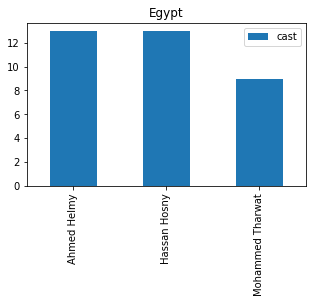

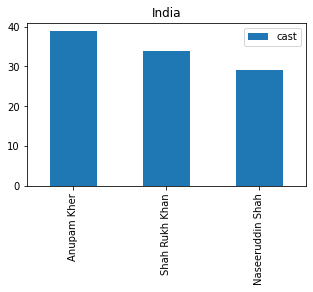

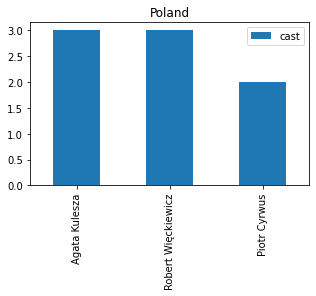

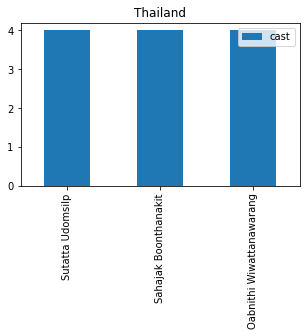

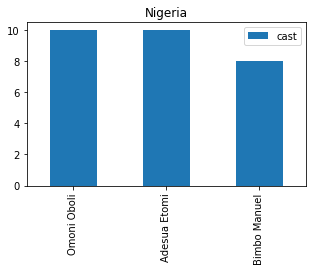

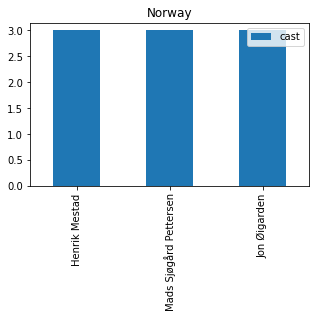

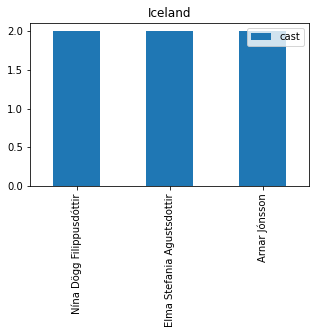

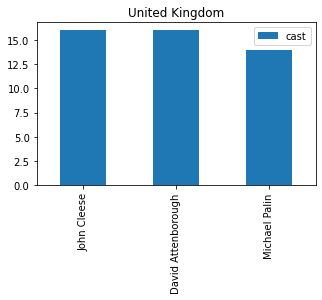

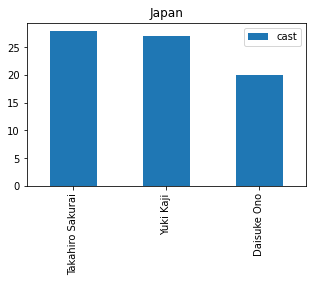

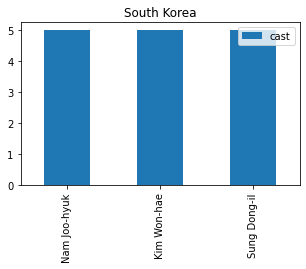

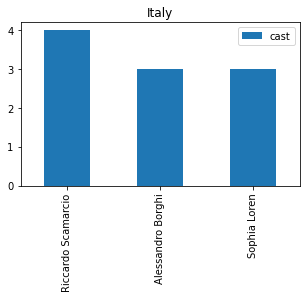

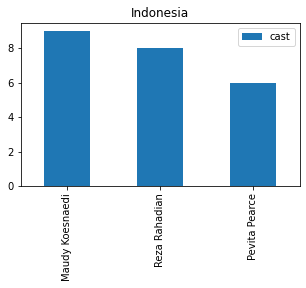

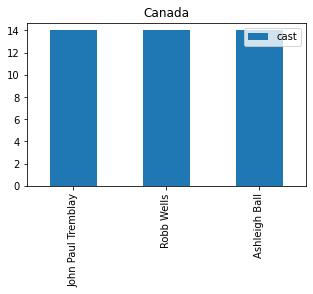

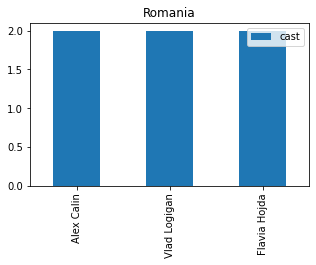

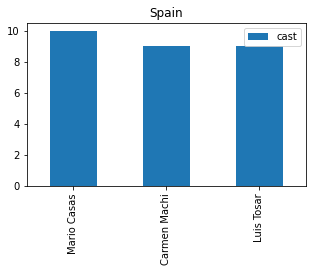

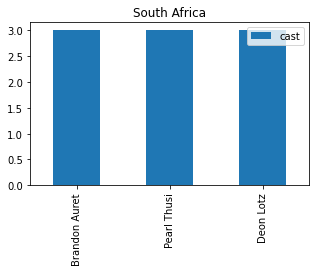

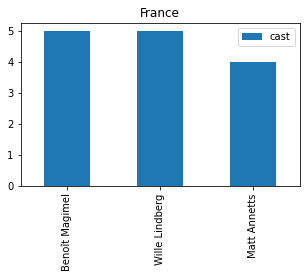

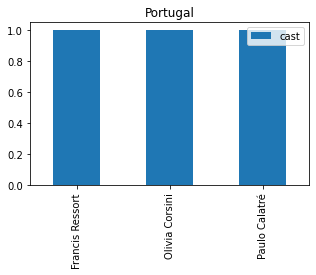

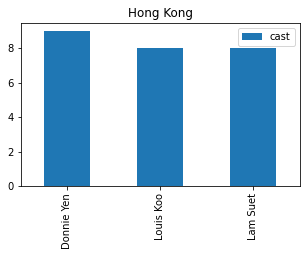

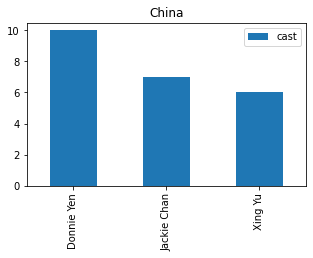

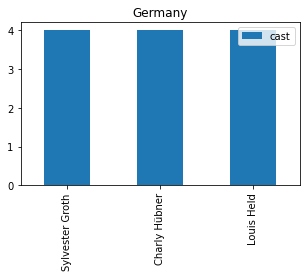

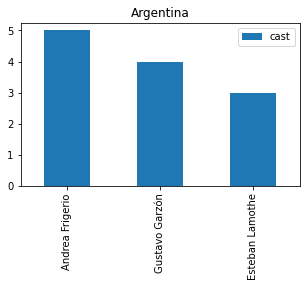

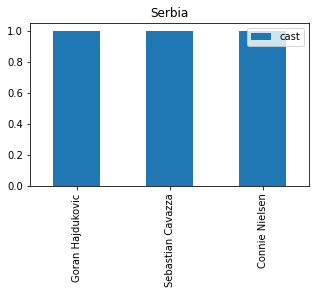

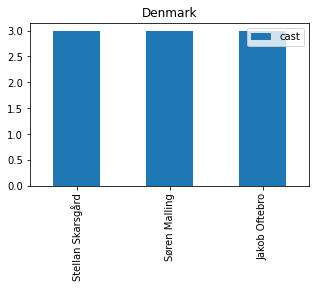

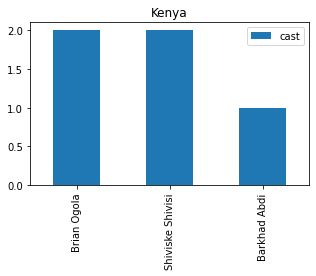

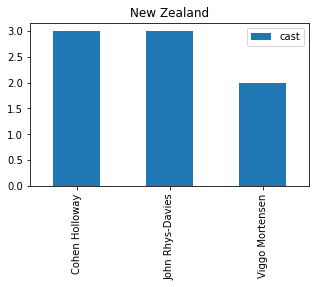

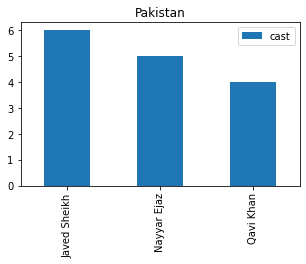

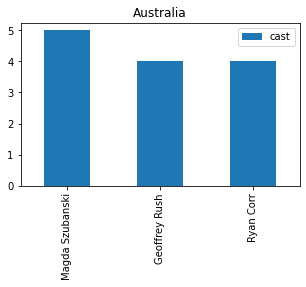

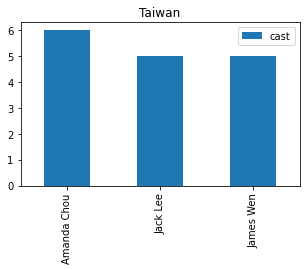

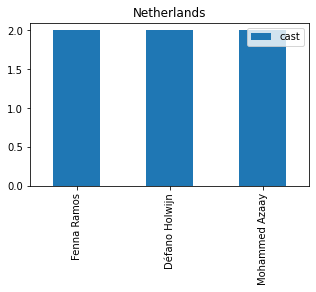

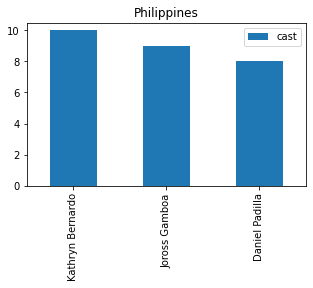

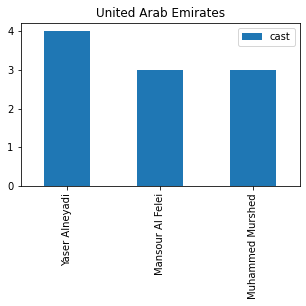

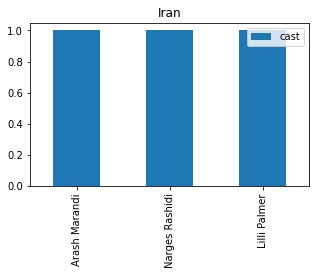

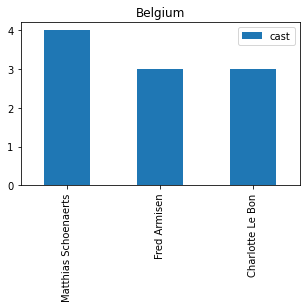

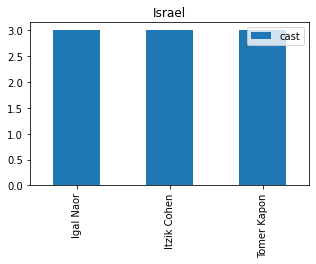

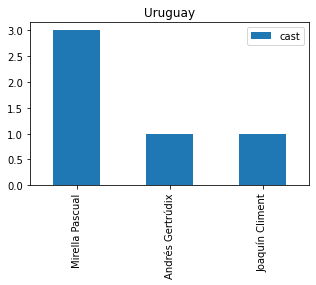

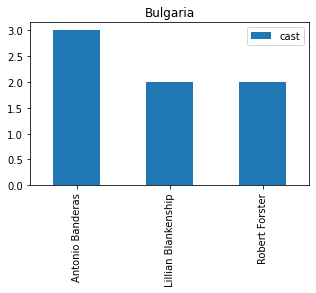

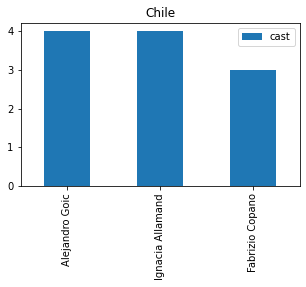

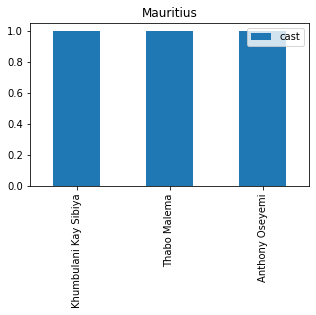

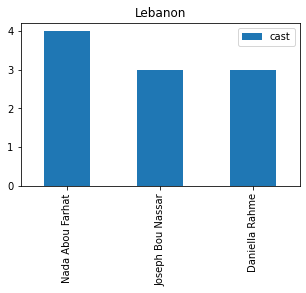

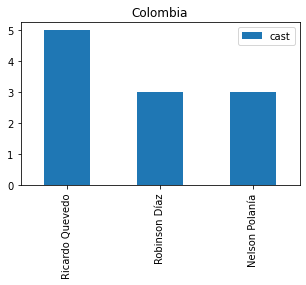

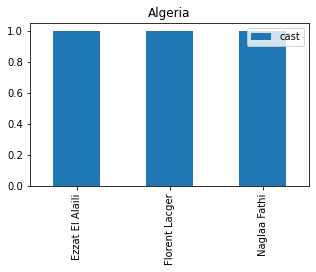

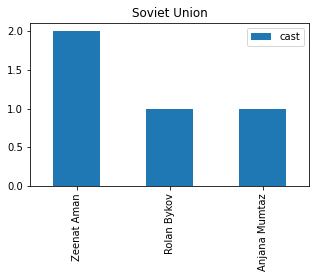

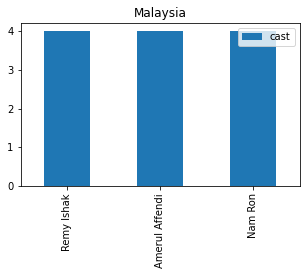

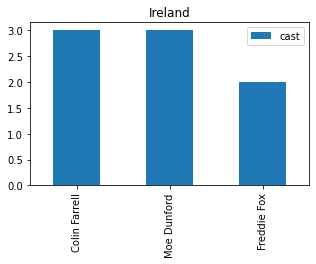

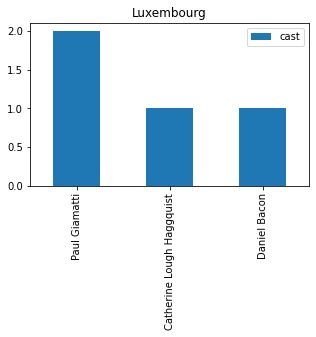

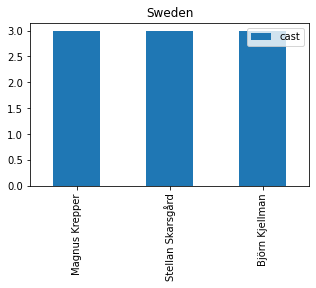

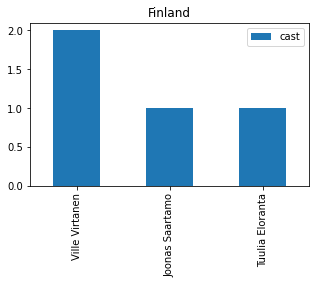

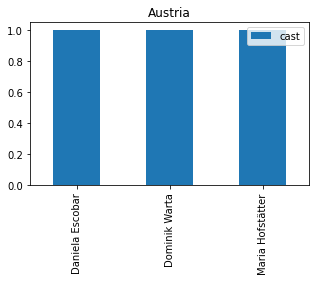

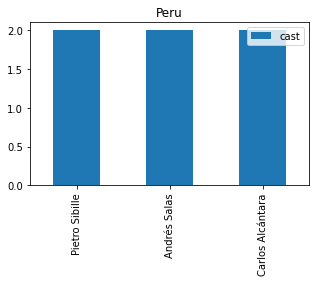

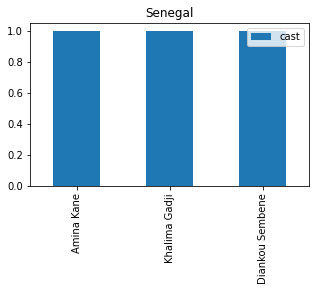

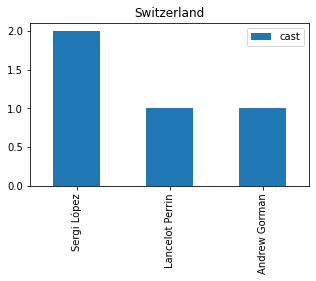

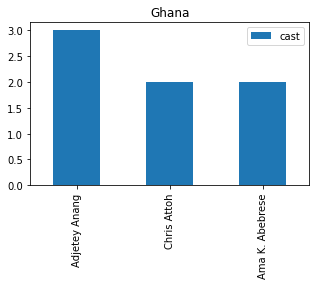

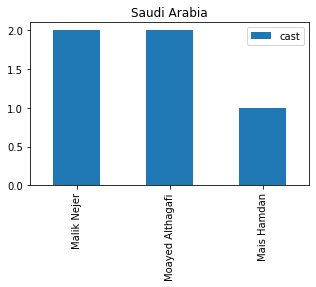

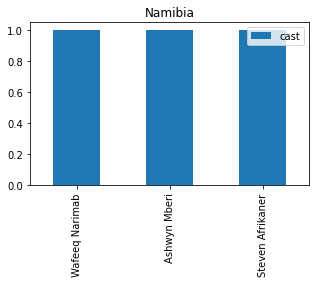

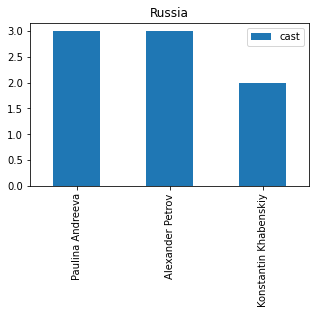

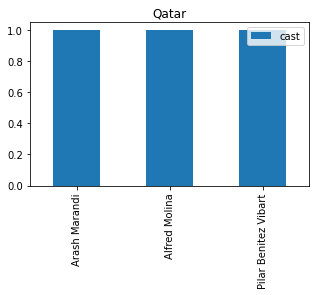

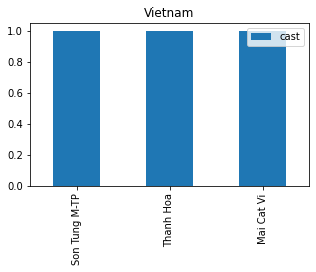

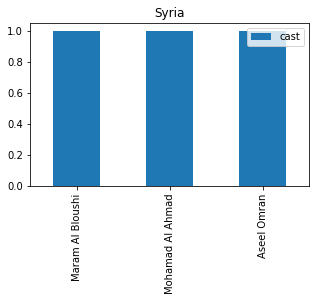

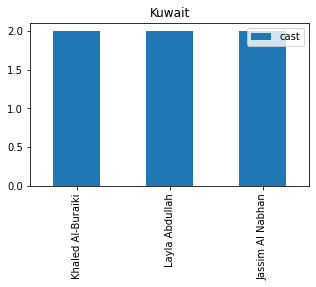

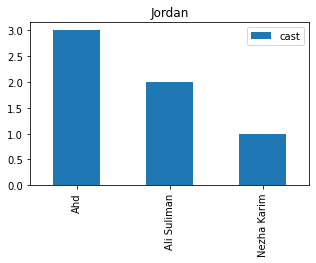

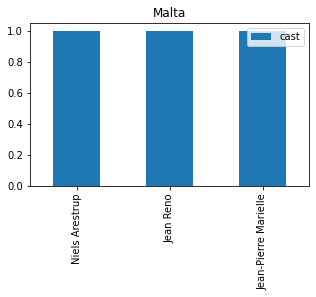

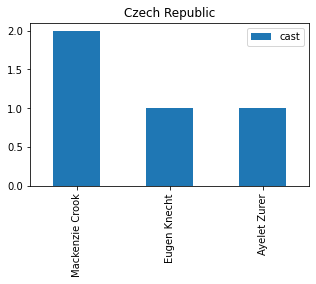

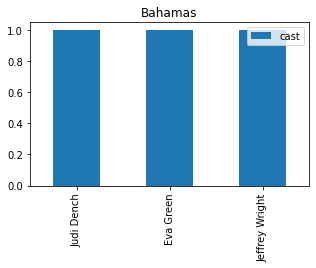

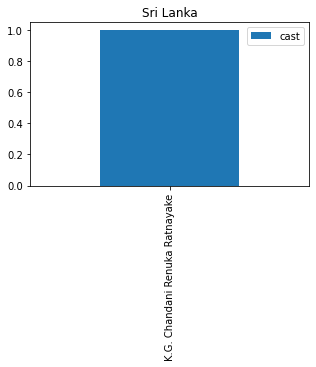

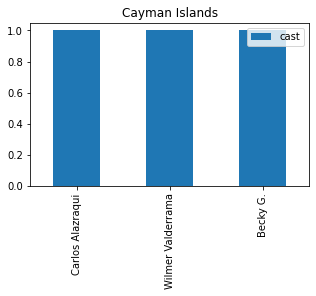

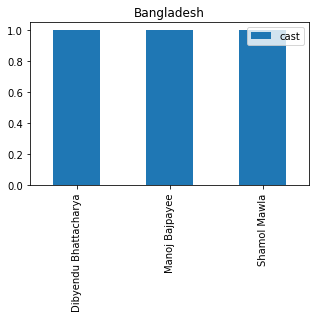

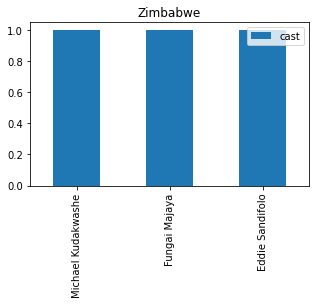

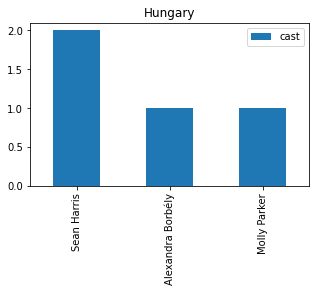

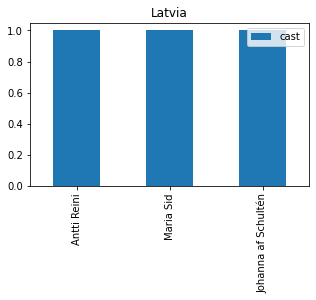

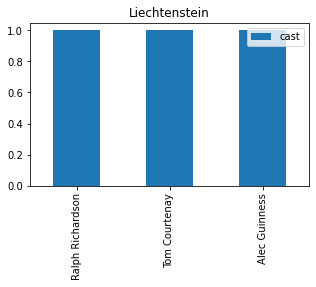

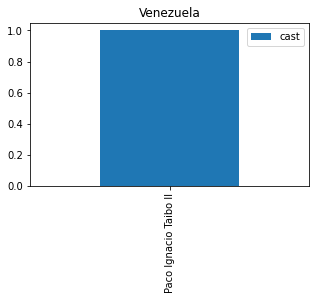

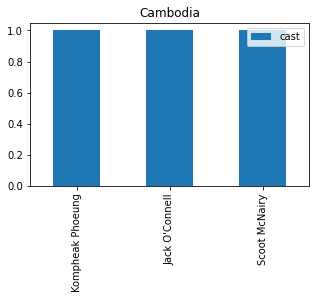

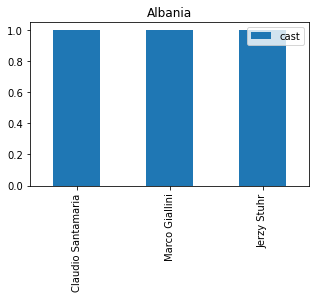

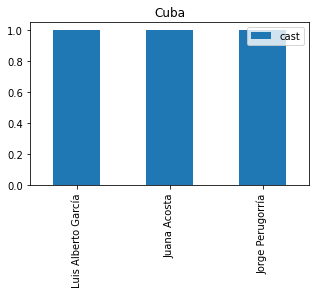

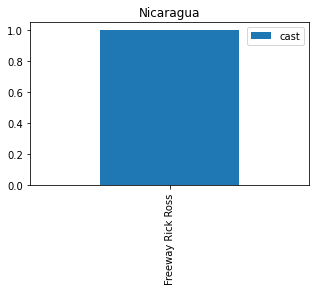

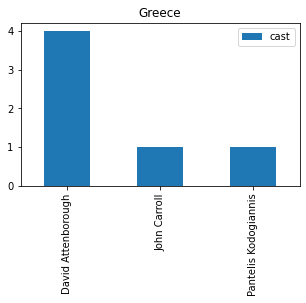

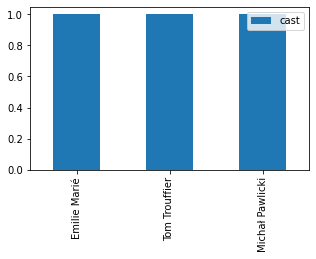

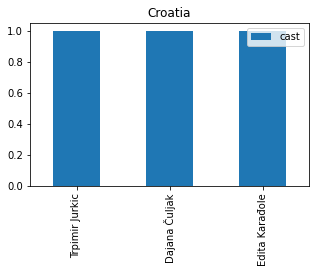

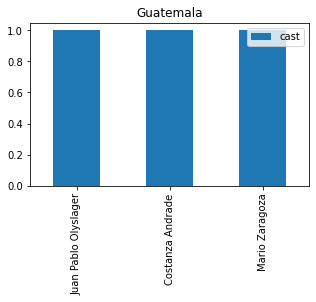

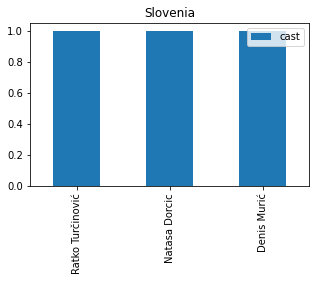

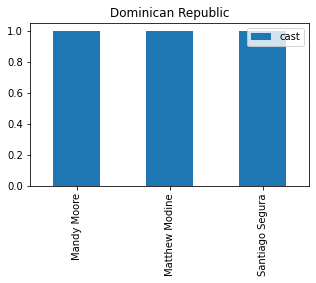

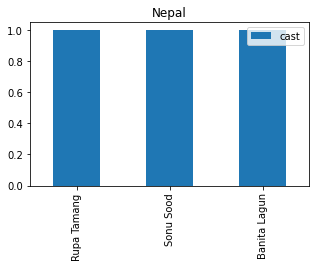

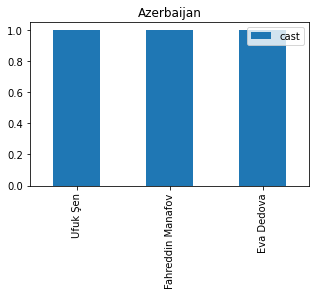

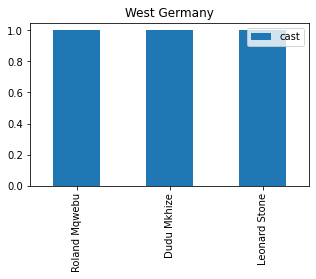

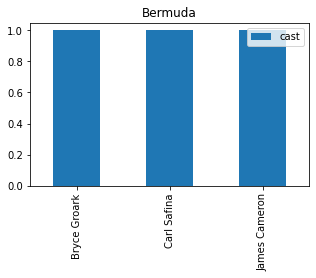

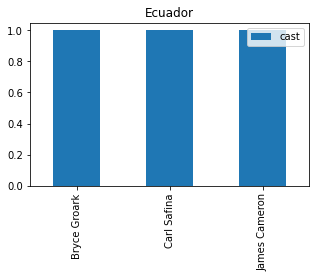

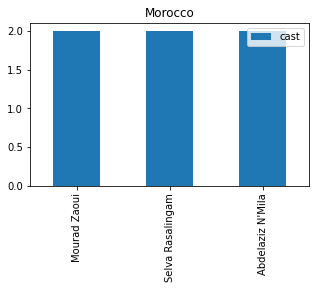

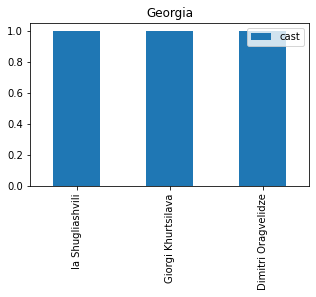

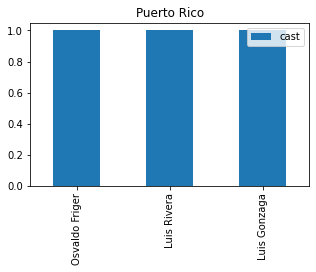

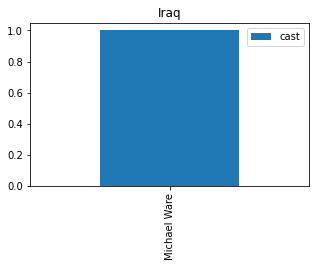

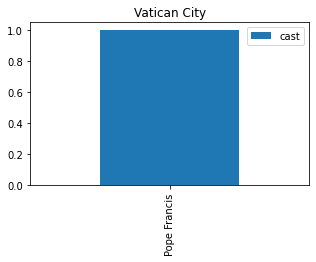

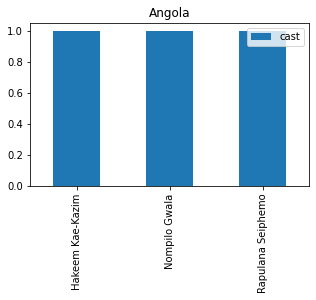

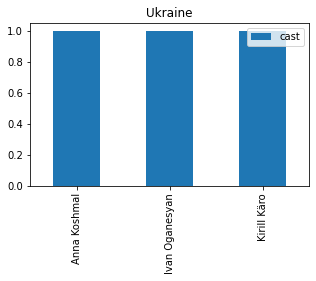

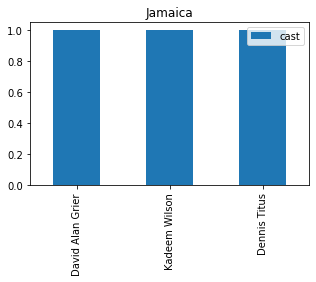

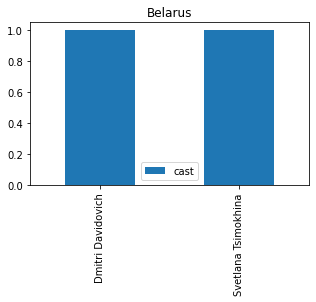

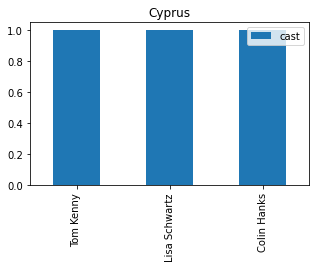

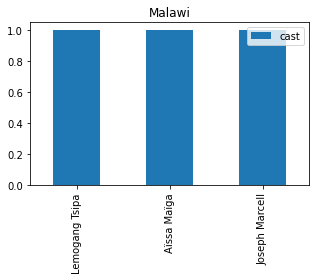

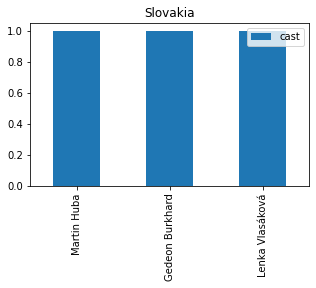

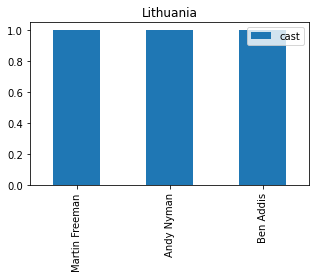

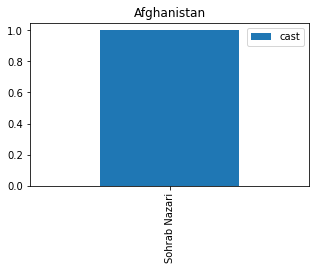

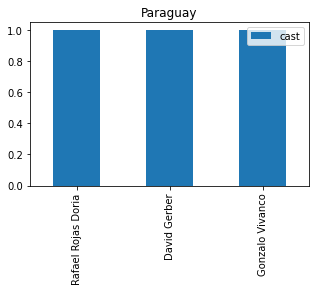

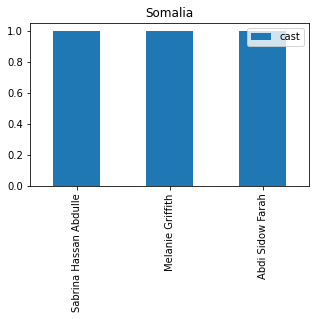

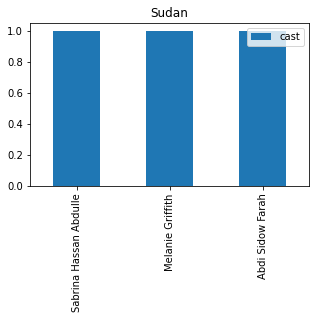

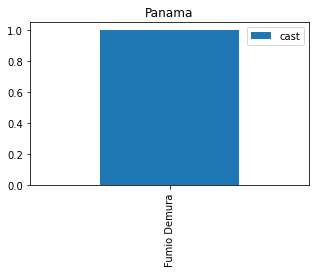

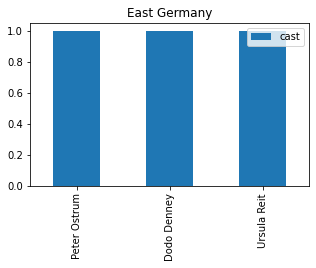

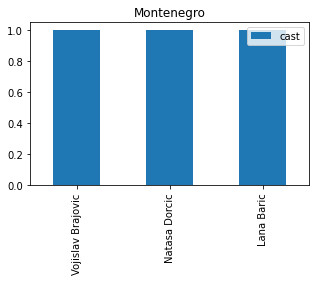

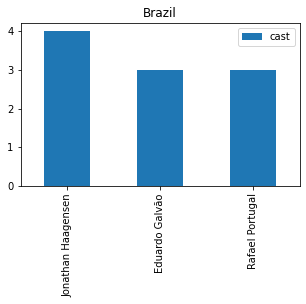

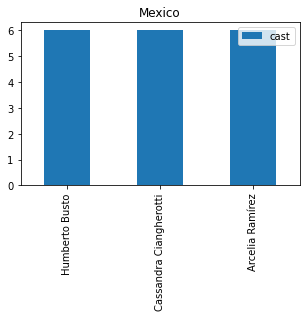

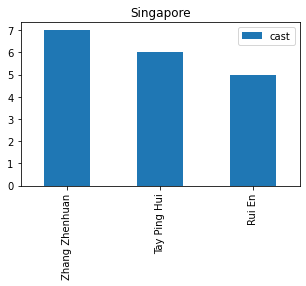

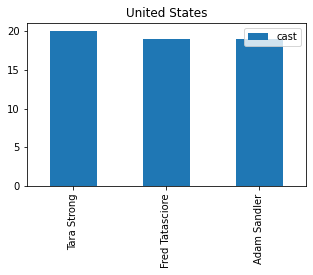

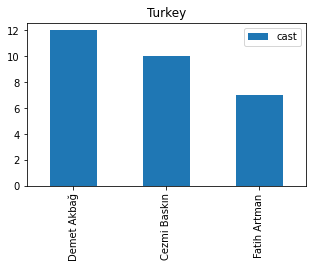

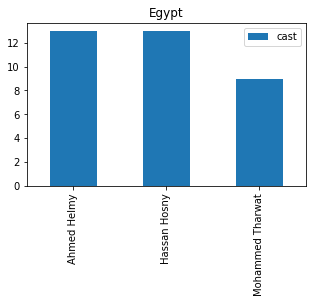

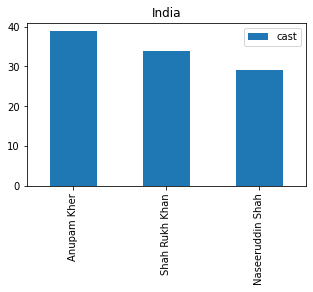

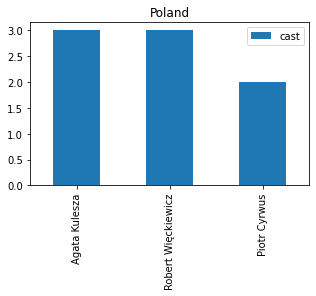

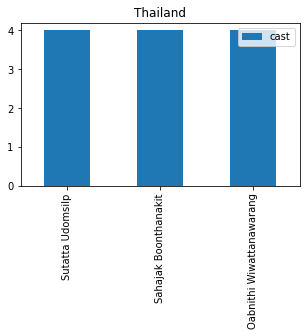

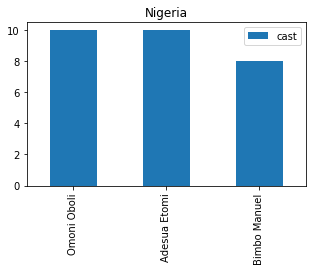

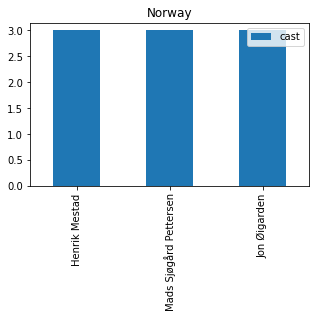

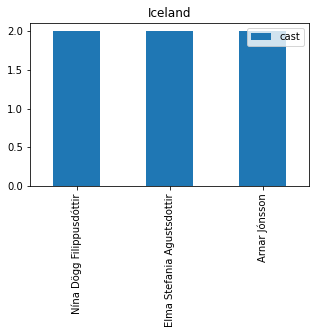

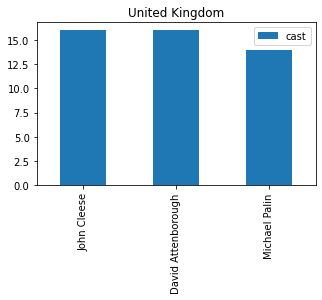

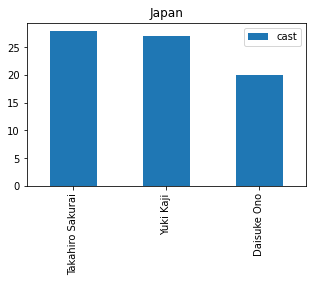

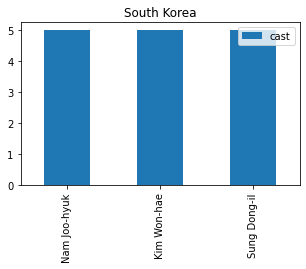

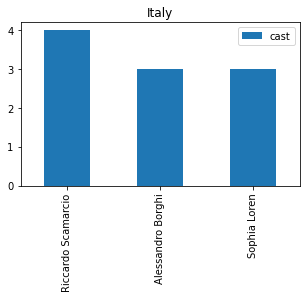

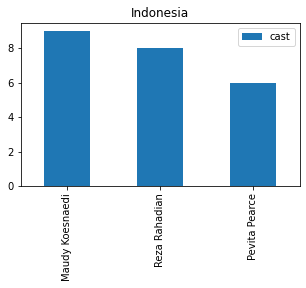

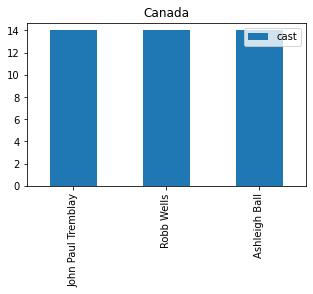

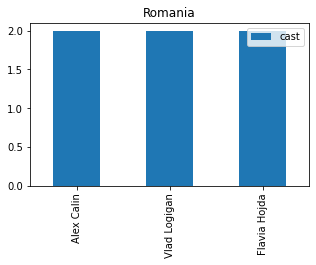

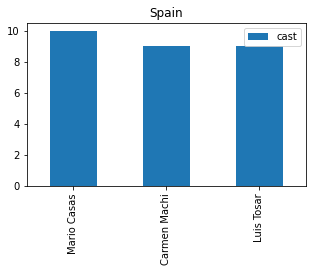

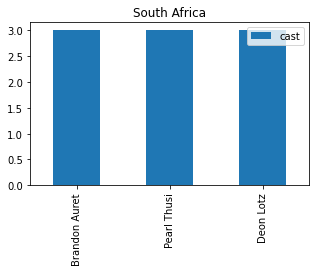

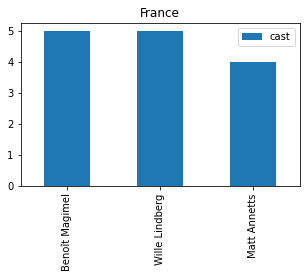

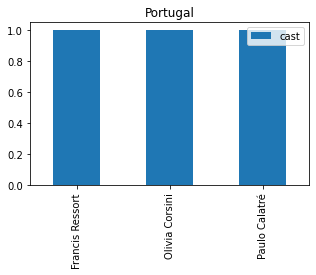

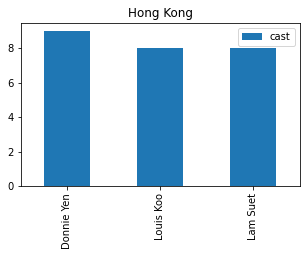

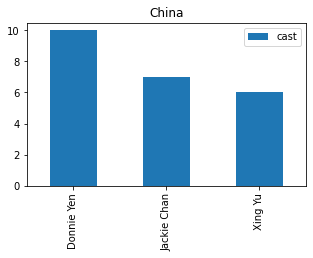

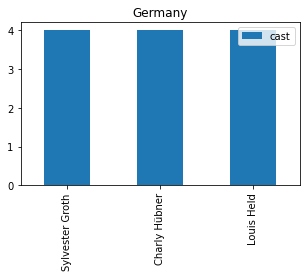

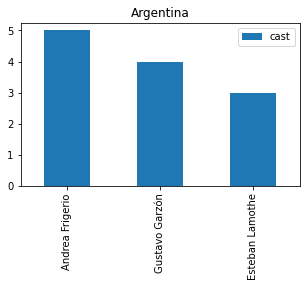

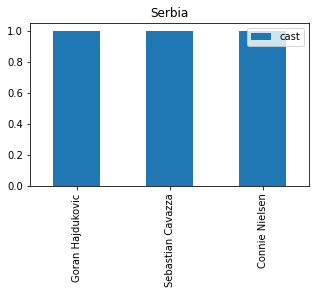

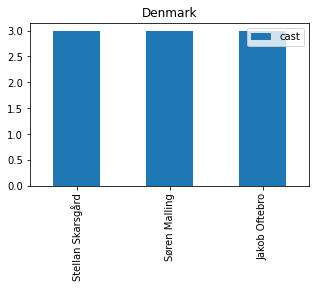

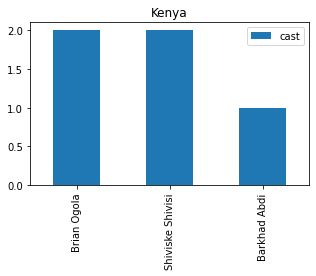

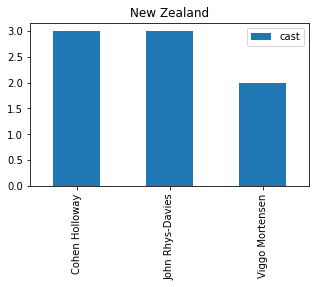

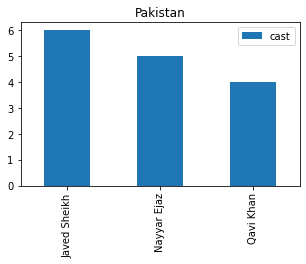

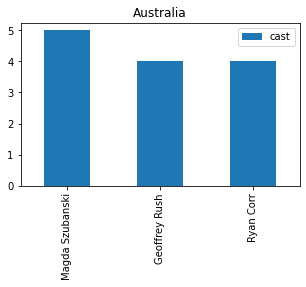

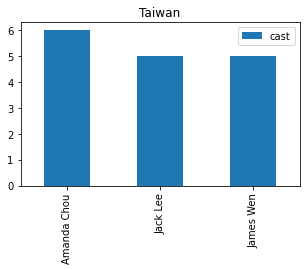

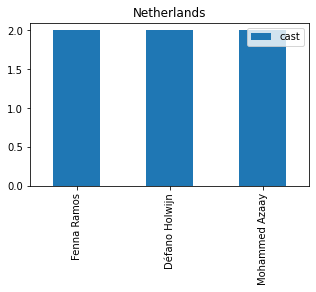

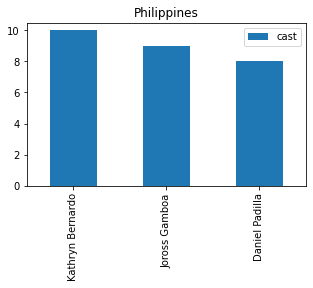

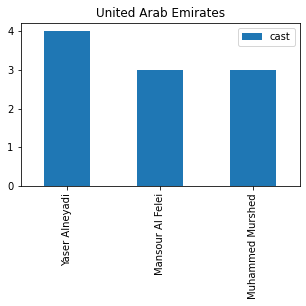

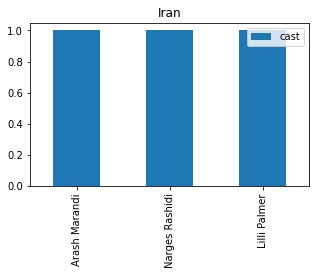

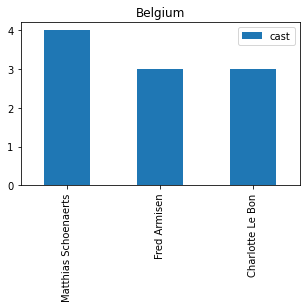

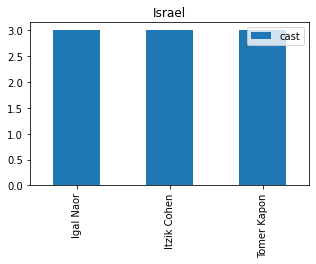

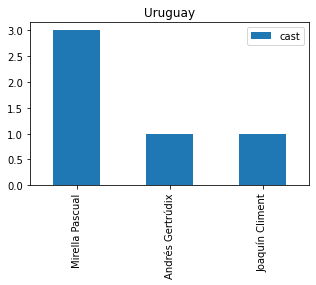

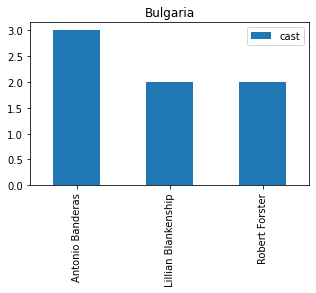

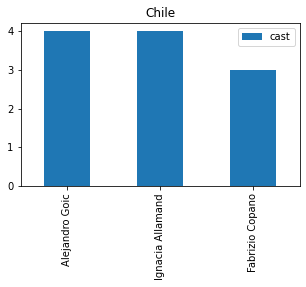

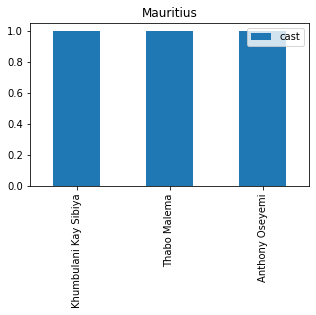

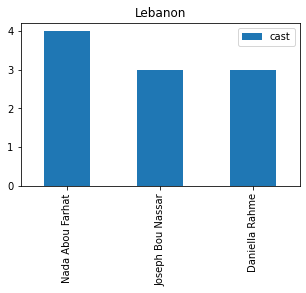

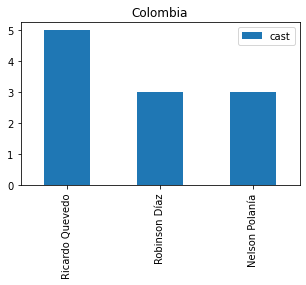

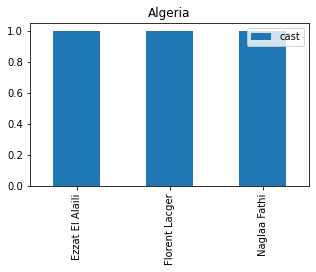

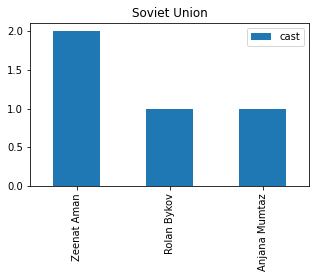

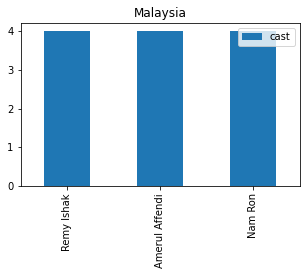

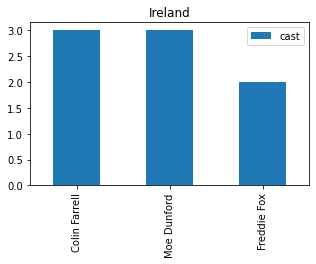

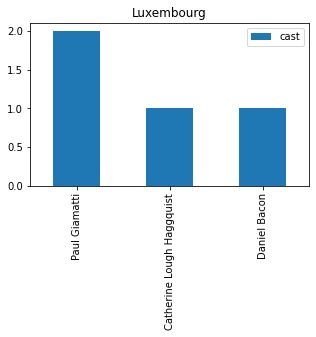

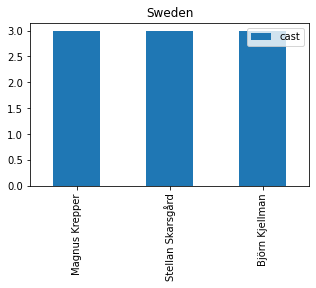

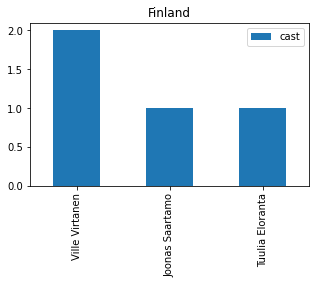

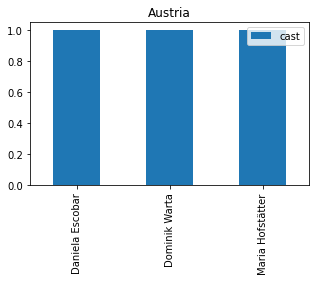

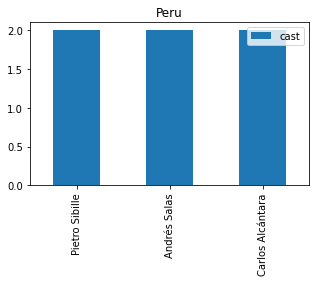

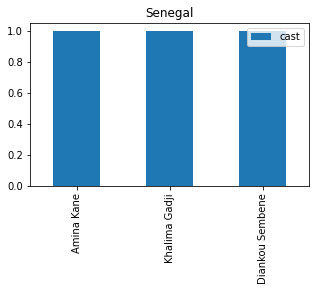

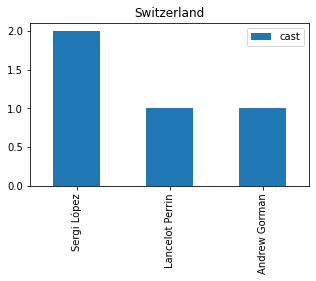

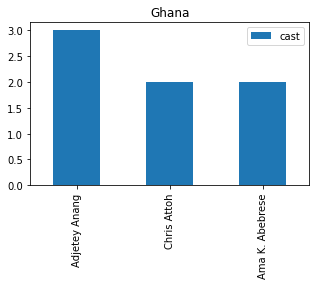

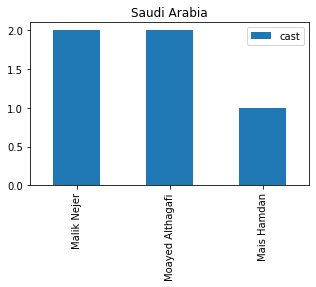

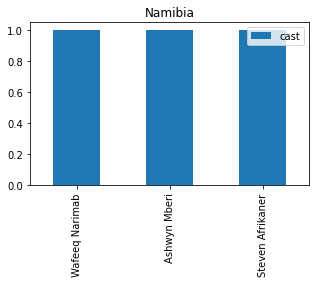

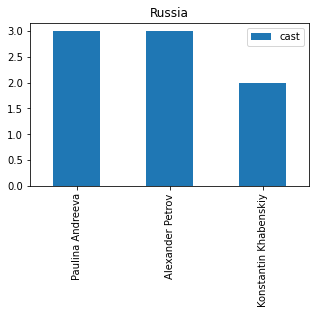

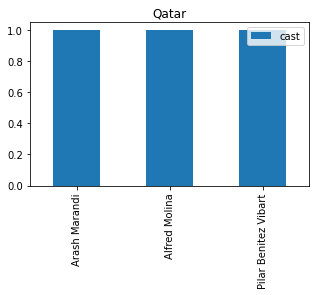

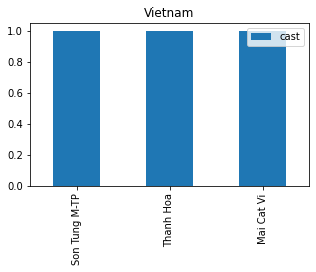

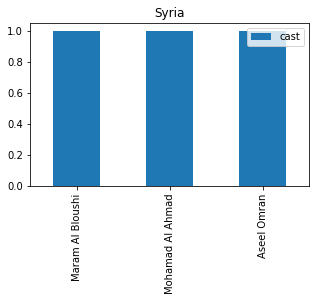

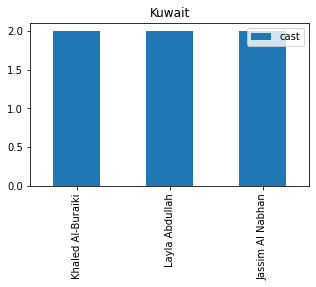

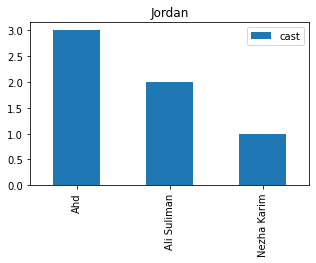

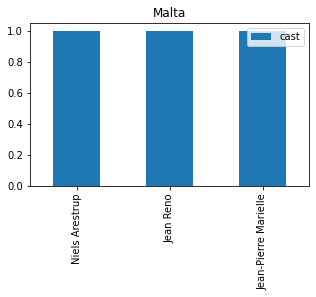

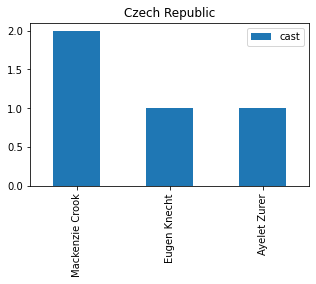

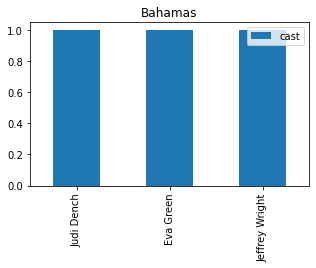

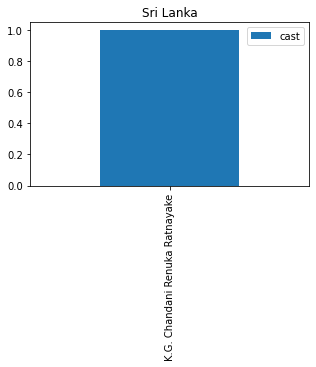

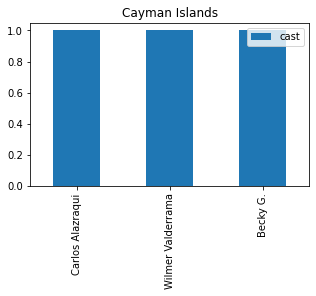

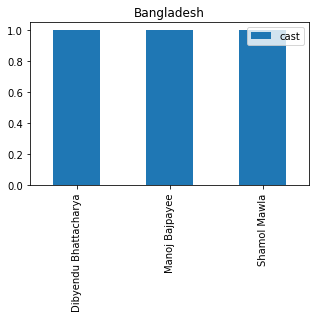

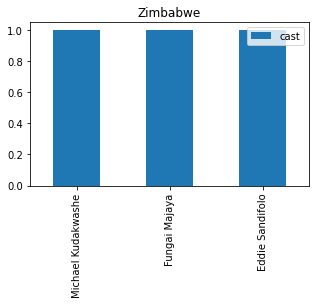

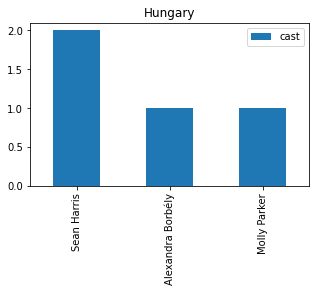

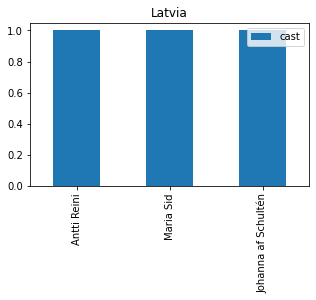

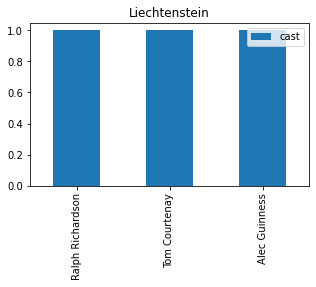

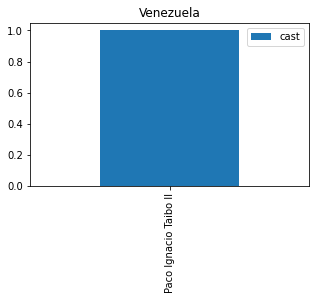

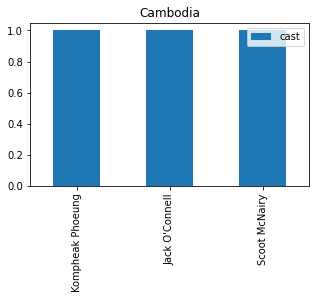

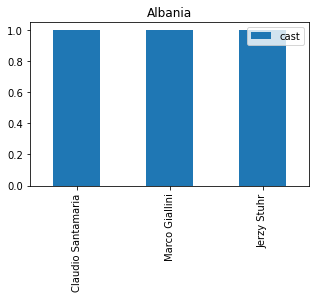

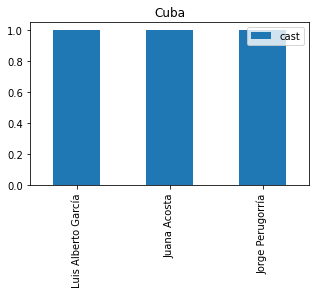

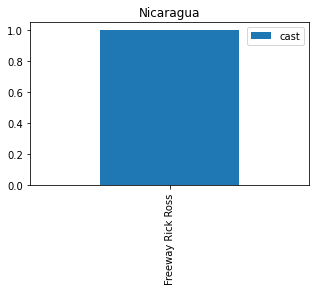

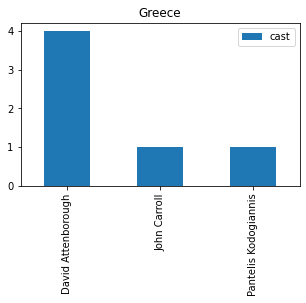

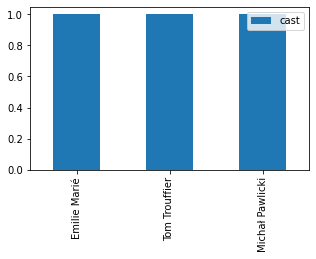

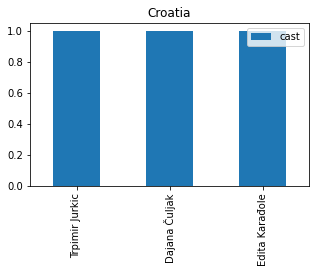

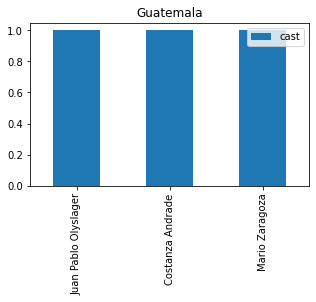

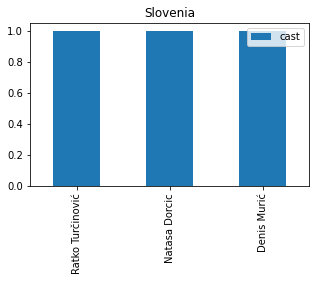

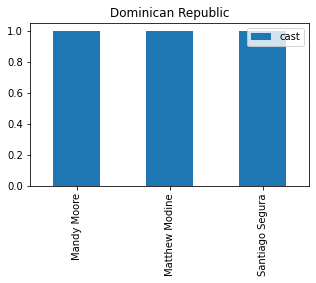

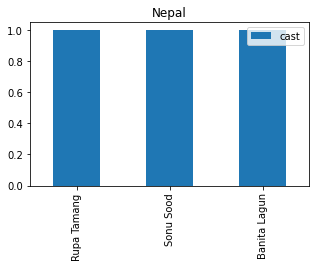

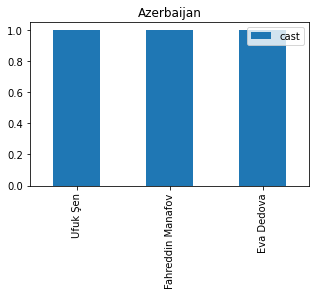

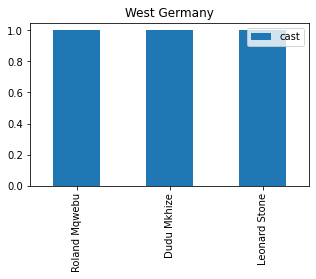

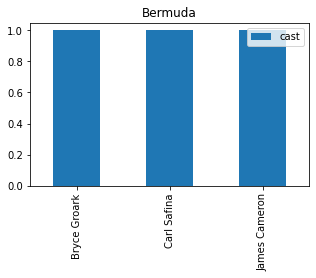

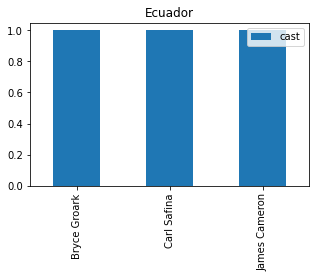

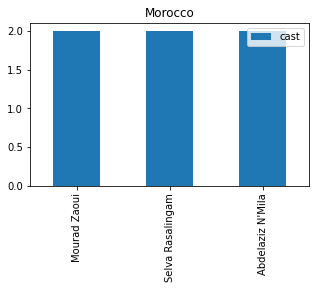

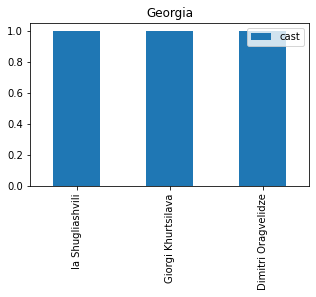

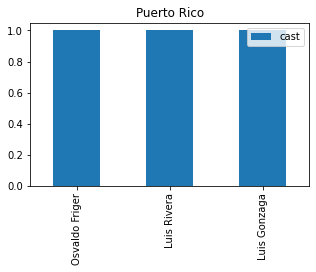

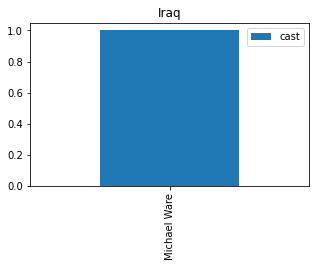

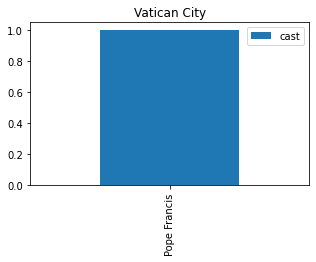

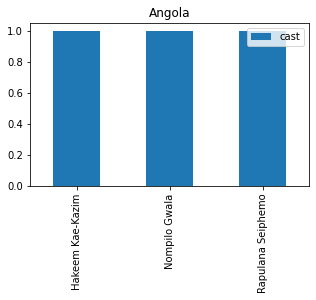

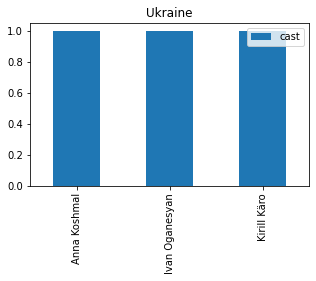

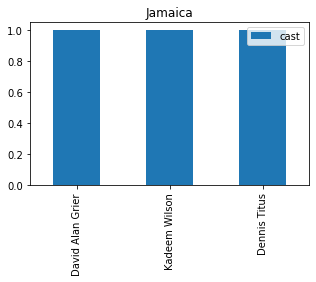

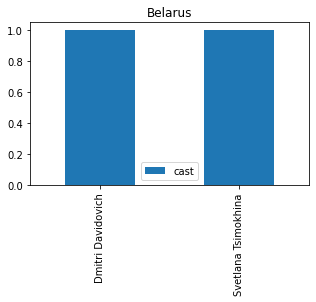

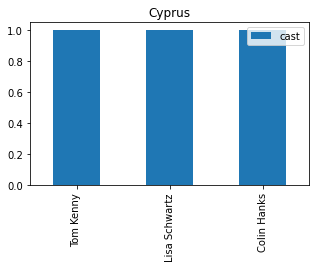

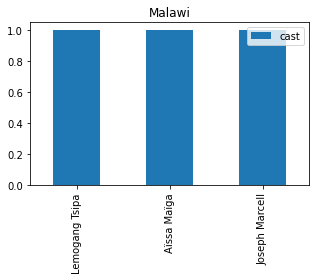

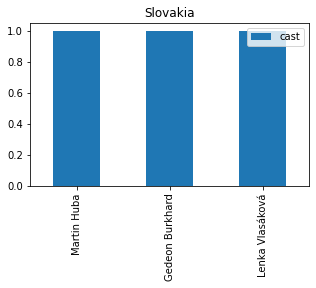

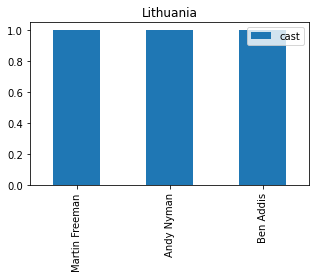

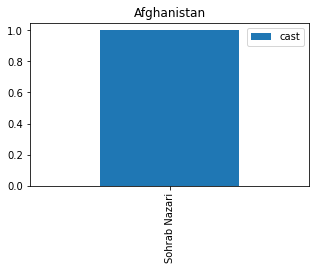

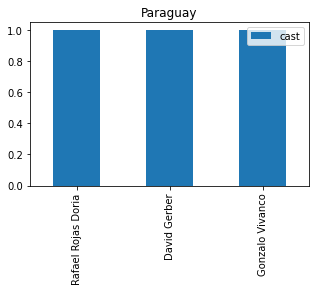

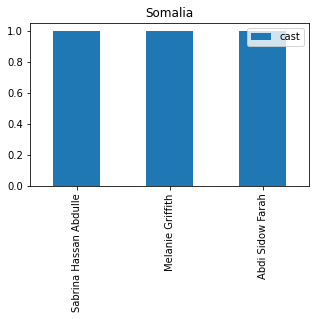

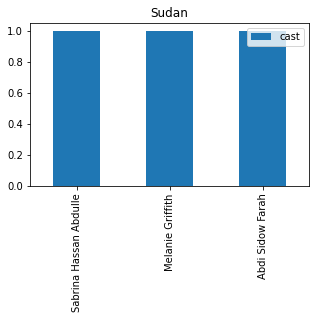

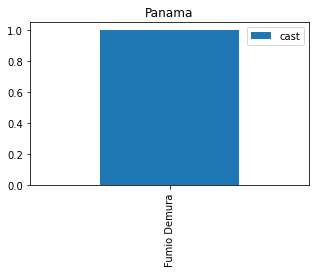

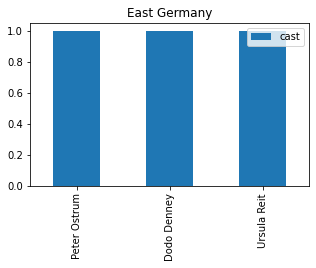

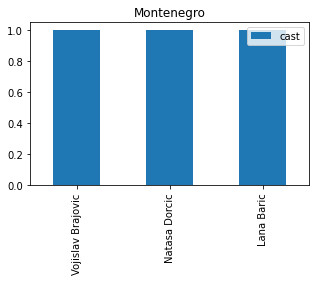

In [ ]:
# 5. Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε κάθε χώρα. Κάντε το ίδιο και για τις σειρές
import numpy as np

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['type'], inplace=True)
df_netflix.dropna(subset = ['country'], inplace=True)
df_netflix.dropna(subset = ['cast'], inplace=True)

#kratame mono ta columns pou theloyme kai kanoume duo boolean gia elegxous
new_general_df = df_netflix[['type','cast','country']].copy()
new_df_movies = new_general_df[new_general_df['type'] == 'Movie']
new_df_show = new_general_df[new_general_df['type'] == 'TV Show']

#ftiaxnoyme new df gia ta movies mazi me countries kai cast
new_df_movies =pd.DataFrame(new_general_df.country.str.replace(', ',',').str.split(',').tolist(), index=new_general_df.cast).stack()
new_df_movies = new_df_movies.reset_index([0, 'cast'])
new_df_movies.columns = ['cast','country']
new_df_movies =pd.DataFrame(new_df_movies.cast.str.replace(', ',',').str.split(',').tolist(), index=new_df_movies.country).stack()
new_df_movies = new_df_movies.reset_index([0, 'country'])
new_df_movies.columns = ['country','cast']

#ftiaxnoyme new df gia ta shows mazi me countries kai cast
new_df_show =pd.DataFrame(new_general_df.country.str.replace(', ',',').str.split(',').tolist(), index=new_general_df.cast).stack()
new_df_show = new_df_show.reset_index([0, 'cast'])
new_df_show.columns = ['cast','country']
new_df_show =pd.DataFrame(new_df_show.cast.str.replace(', ',',').str.split(',').tolist(), index=new_df_show.country).stack()
new_df_show = new_df_show.reset_index([0, 'country'])
new_df_show.columns = ['country','cast']


#ftiaxnoume mia lista me oles tis xwres pou emfanizontai
country_list = df_netflix.country
country_list = pd.DataFrame(country_list.str.replace(', ',',').str.split(',').tolist(), index=country_list).stack()
country_list = country_list.reset_index([0, 'country'])
del country_list['country']
country_list =country_list.drop_duplicates()
country_list.columns= ['country']
country_list.dtypes

# Gia kathe xwra ektupwse tous 3 top hthopoious sta movies
for country in country_list.country:
  new_df1 = pd.DataFrame(data=new_df_movies.loc[new_df_movies['country'] == country, 'cast'].value_counts().head(3))
  new_df1.plot(kind='bar',figsize=(5,3),title= country)

# Gia kathe xwra ektupwse tous 3 top hthopoious sta shows
for country in country_list.country:
  new_df2 = pd.DataFrame(data=new_df_show.loc[new_df_show['country'] == country, 'cast'].value_counts().head(3))
  new_df2.plot(kind='bar',figsize=(5,3),title= country)


**6.Το netflix υποστηρίζει ότι παρέχει πλούσιο περιεχόμενο για όλες τις ηλικίες.Αληθεύει αυτό; Φτιάξτε ένα γράφημα το οποίο συγκεντρώνει το πλήθος των ταινιων ανάλογα με την προτεινόμενη ηλικία . Κάντε το ίδιο γράφημα και για τις σειρές.**

Ουσιαστικά φτίαξαμε λίστες με τα επιτρεπόμενα όρια κάθε ηλικίας και για κάθε row το τοποθετούσαμε στο αναλογο κρουπ. Μια φορά για ταινίες και μία για shows.

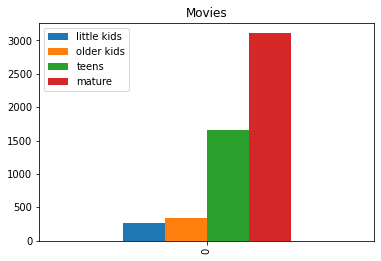

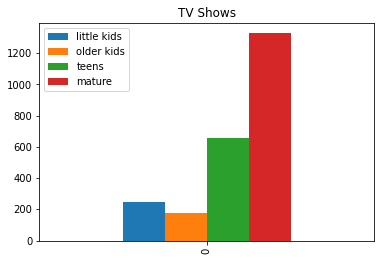

In [ ]:
# 6. Το netflix υποστηρίζει ότι παρέχει πλούσιο περιεχόμενο για όλες τις ηλικίες.

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['type'], inplace=True)
df_netflix.dropna(subset = ['rating'], inplace=True)

#kratame mono ta columns pou theloyme kai kanoume duo boolean gia elegxous
new_df_general= df_netflix[['type','rating']]
new_df_general_movie = new_df_general[new_df_general['type'] == 'Movie']
new_df_general_serie = new_df_general[new_df_general['type'] == 'TV Show']

# ftiaxnoume tis listes gia ta ratings kai dhmiourgoume metrhtes
list_for_l_kids = ['G','TV-Y', 'TV-G']
count_for_l_kids_movie = 0
count_for_l_kids_serie = 0

list_for_o_kids = ['PG','TV-Y7','TV-Y7-FV' 'TV-PG']
count_for_o_kids_movie = 0
count_for_o_kids_serie = 0

list_for_teens = ['PG-13','TV-14']
count_for_teens_movie = 0
count_for_teens_serie = 0

list_for_mature = ['R','NC-17','TV-MA']
count_for_mature_movie = 0
count_for_mature_serie = 0

# gia tis tainies metra ta ratings
for rating in new_df_general_movie['rating']:
  if rating in list_for_l_kids:
    count_for_l_kids_movie = count_for_l_kids_movie + 1
  elif rating in list_for_o_kids:
    count_for_o_kids_movie = count_for_o_kids_movie + 1
  elif rating in list_for_teens:
    count_for_teens_movie = count_for_teens_movie + 1
  else :
    count_for_mature_movie = count_for_mature_movie + 1


# gia tis seires metra ta ratings
for rating in new_df_general_serie['rating']:
  if rating in list_for_l_kids:
    count_for_l_kids_serie = count_for_l_kids_serie + 1
  elif rating in list_for_o_kids:
    count_for_o_kids_serie = count_for_o_kids_serie + 1
  elif rating in list_for_teens:
    count_for_teens_serie = count_for_teens_serie + 1
  else :
    count_for_mature_serie = count_for_mature_serie + 1

#plot gia tainies
df_ratings_movie = pd.DataFrame({'little kids' : count_for_l_kids_movie,'older kids' : count_for_o_kids_movie ,'teens': count_for_teens_movie , 'mature': count_for_mature_movie},index=[0])
df_ratings_movie.plot(kind='bar',title='Movies')

#plot gia seires
df_ratings_serie = pd.DataFrame({'little kids' : count_for_l_kids_serie,'older kids' : count_for_o_kids_serie ,'teens': count_for_teens_serie , 'mature': count_for_mature_serie},index=[0])
df_ratings_serie.plot(kind='bar',title='TV Shows')

**7.Αν ένας παραγωγός ήθελε να έχει υψηλή ακροαματικότητα, σκέφτεται ότι θα ήταν ίσως καλύτερα να βγάλει την ταινία του σε μία εποχή που δεν υπάρχει ανταγωνισμός. Κάντε ένα γράφημα με το περιεχόμενο που προστίθεται ανά μήνα για να τον βοηθήσετ ενα επιλέξει τη σωστή χρονική περίοδο.**

Πήραμε τα columns από τα genres και το πότε προστέθηκαν. Τα καθαρίσαμε ώστε σε κάθε row να υπάρχει μόνο ένα genre και μία ημερομενία. Τέλος κάναμε γκρουπ τα είδη με βάση τον μήνα που προστέθηκαν. Το γράφημα είναι αρκετά μεγάλο μιας και δεν αναφέρει το τοπ είδος κάθε μήνα αλλά αναφέρεται σε όλα τα είδη. Πχ o Απρίλιος με Drama μπορεί να εμφανιστεί πρώτος αλλα πιο μέσα στο γράφημα μπορεί να εμφανισεί Απρίλιος με Horror.

Text(0, 0.5, 'Frequency')

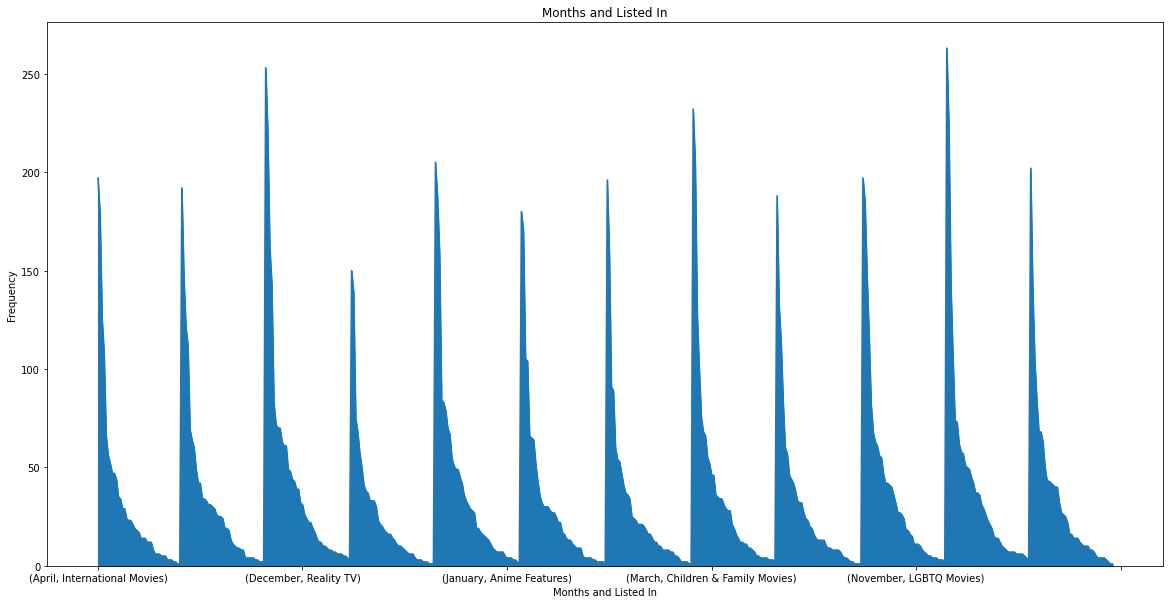

In [ ]:
# 7. Κάντε ένα γράφημα με το περιεχόμενο που προστίθεται ανά μήνα για να τον βοηθήσετε να επιλέξει τη σωστή χρονική περίοδο

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['date_added'], inplace=True)
df_netflix.dropna(subset = ['listed_in'], inplace=True)

# neo df
DateNGenre_df =pd.DataFrame(df_netflix.listed_in.str.replace(', ',',').str.split(',').tolist(), index=df_netflix.date_added).stack()
DateNGenre_df = DateNGenre_df.reset_index([0, 'date_added'])
DateNGenre_df.columns = ['date_added','listed_in']

#allazoume thn morfh tou date
DateNGenre_df['date_added'] = pd.to_datetime(DateNGenre_df['date_added'])

#plot
plot_for_months=DateNGenre_df.groupby(DateNGenre_df['date_added'].dt.strftime('%B'))['listed_in'].value_counts().plot(kind='area',figsize=(20,10),title='Months and Listed In')
plot_for_months.set_xlabel('Months and Listed In')
plot_for_months.set_ylabel('Frequency')

**8. Ετοιμάστε ένα γράφημα που παρουσιάζει συγκεντρωτικά τα είδη του περιεχομένου.**

Πήραμε το column listed_in και το καθαρίσαμε. Ύστερα μετρήσαμε πόσες φορές εμφανίζεται το κάθε είδος.

Text(0, 0.5, 'Frequency')

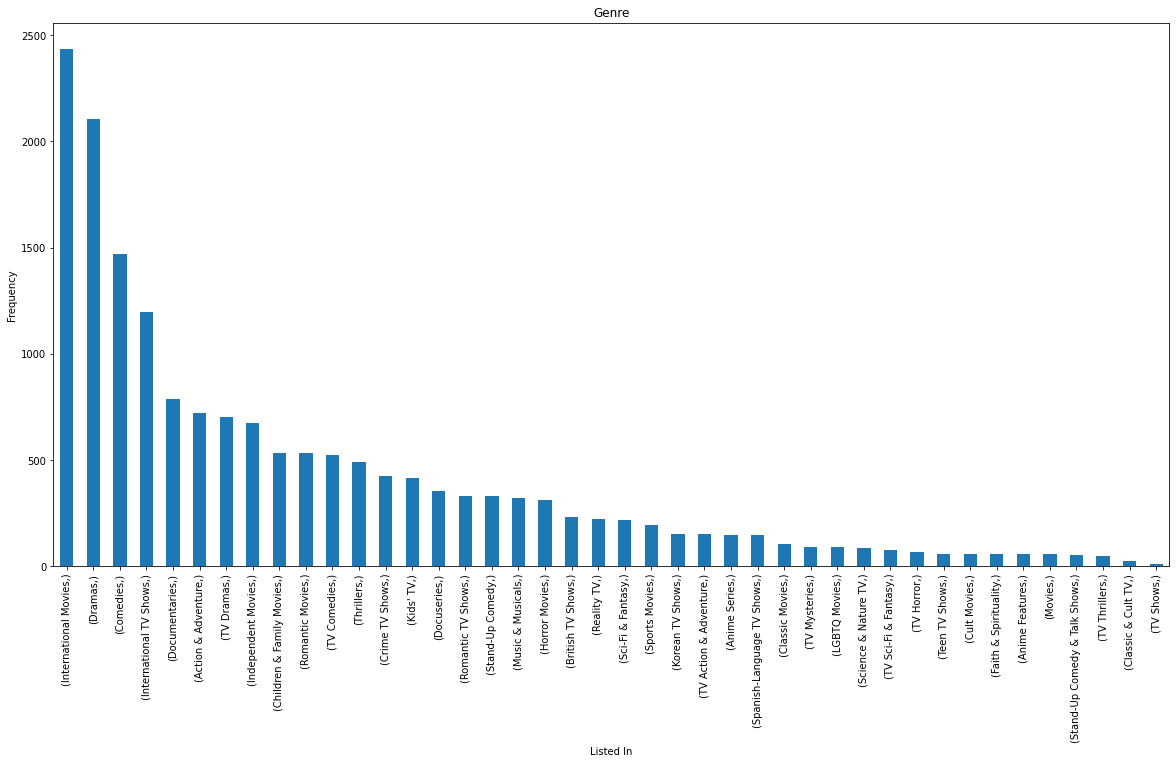

In [ ]:
# 8. Ετοιμάστε ένα γράφημα που παρουσιάζει συγκεντρωτικά τα είδη του περιεχομένου

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['listed_in'], inplace=True)

#neo df
Genre_df =pd.DataFrame(df_netflix.listed_in.str.replace(', ',',').str.split(',').tolist(), index=df_netflix.listed_in).stack()
Genre_df = Genre_df.reset_index([0, 'listed_in'])
Genre_df.columns = ['something','listed_in']
del Genre_df['something']

#plot
plot_for_genre =Genre_df.value_counts().plot(kind='bar',figsize=(20,10),title='Genre')
plot_for_genre.set_xlabel('Listed In')
plot_for_genre.set_ylabel('Frequency')

**9. Μελετηστε τους σκηνοθέτες ανά χώρα και παρουσιάστε σχετικά γραφήματα**

Καθαρίσαμε τις στήλες χωρών και σκηνοθετών και για κάθε χώρα εμφανίσαμε τους σκηνοθέτες με τις περισσότερες ταινίες.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


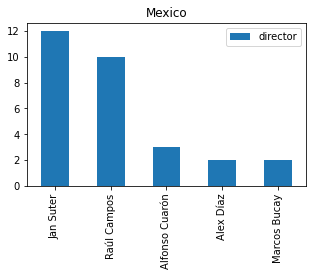

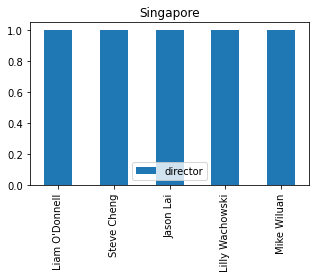

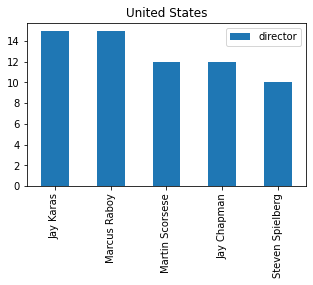

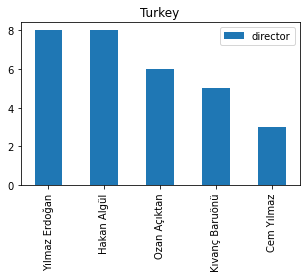

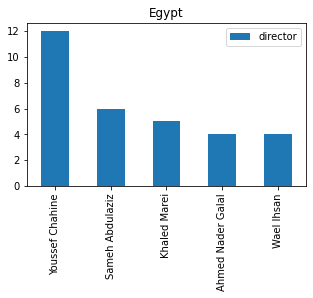

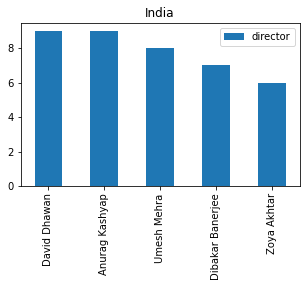

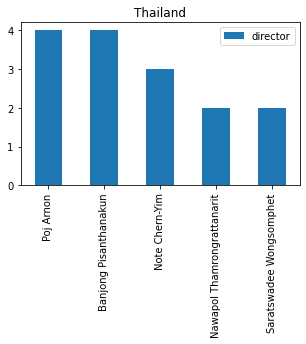

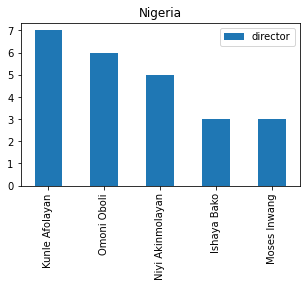

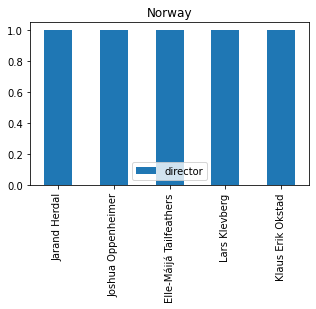

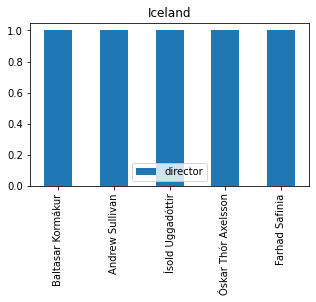

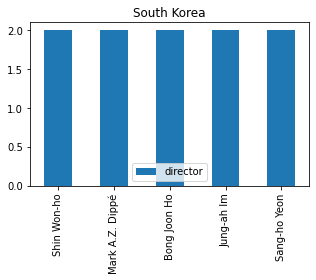

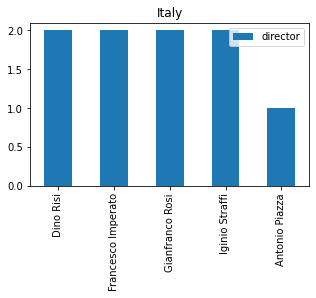

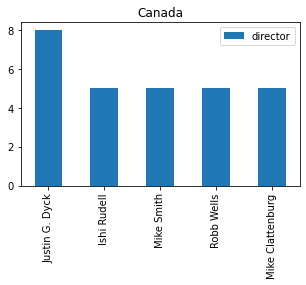

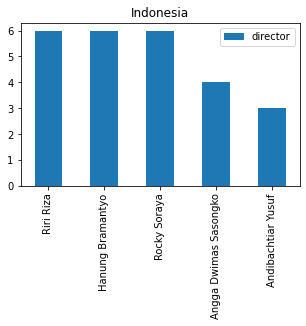

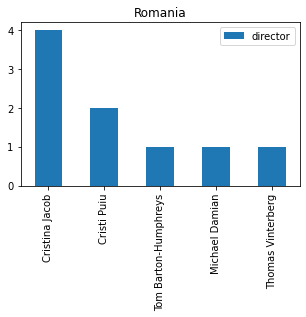

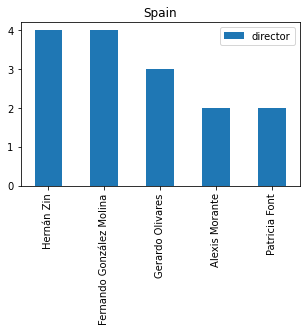

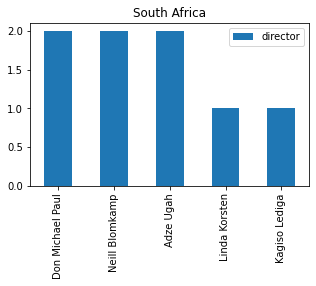

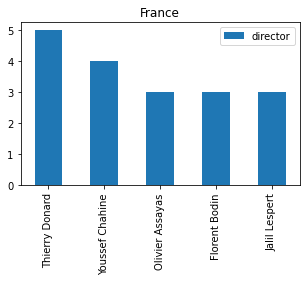

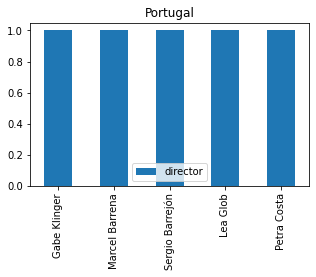

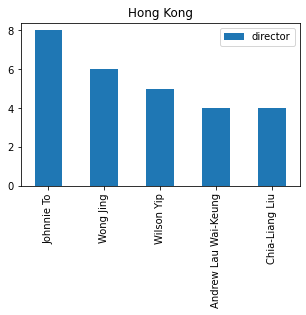

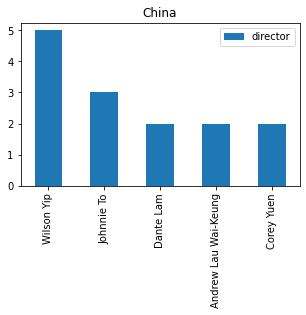

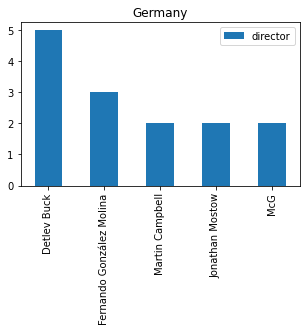

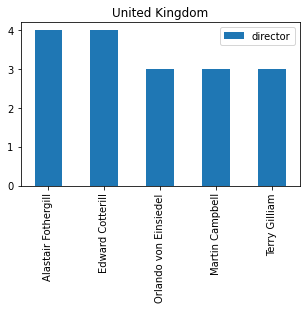

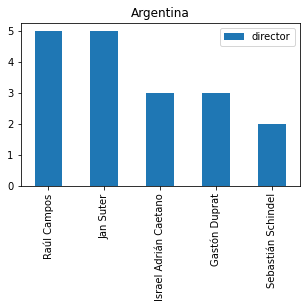

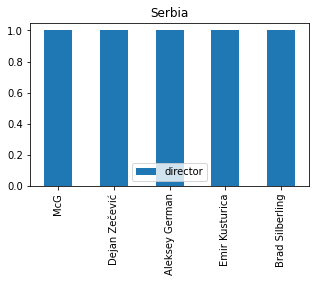

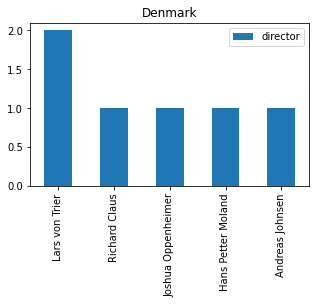

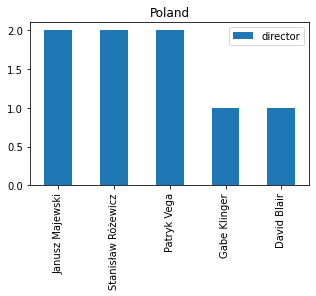

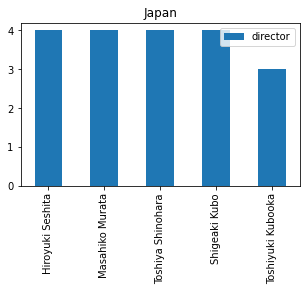

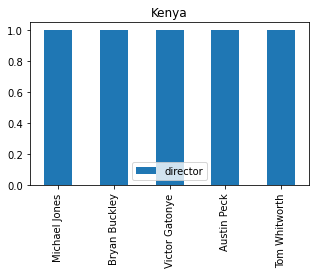

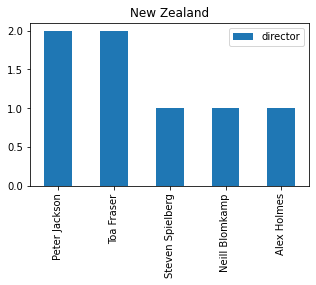

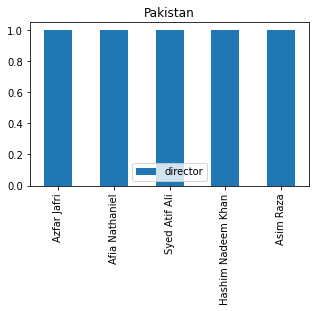

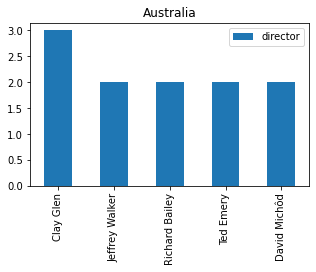

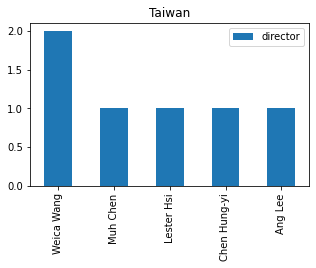

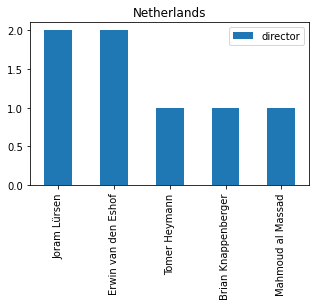

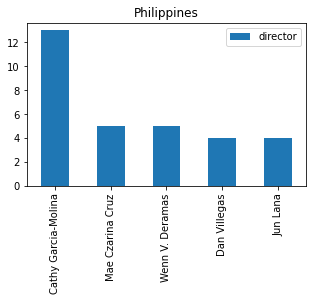

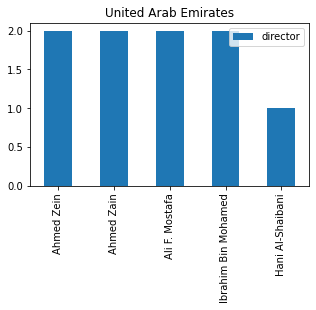

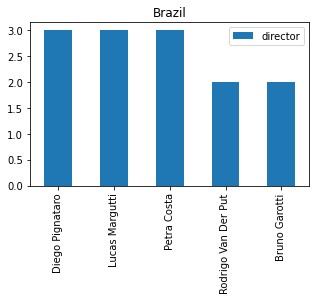

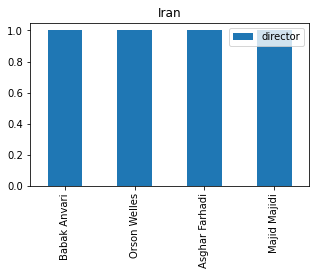

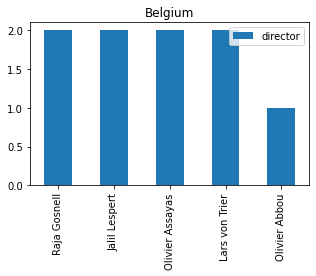

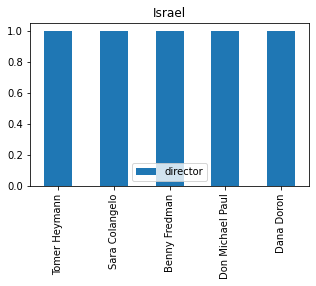

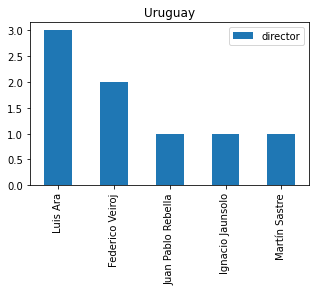

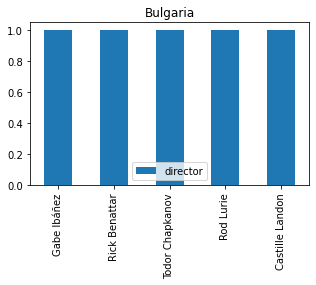

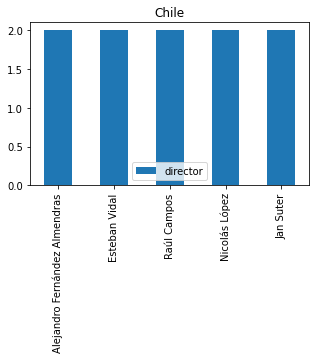

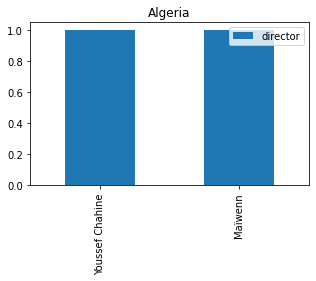

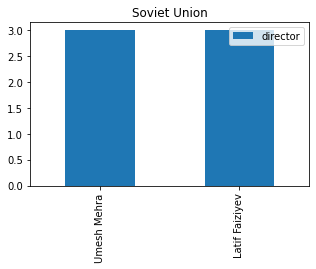

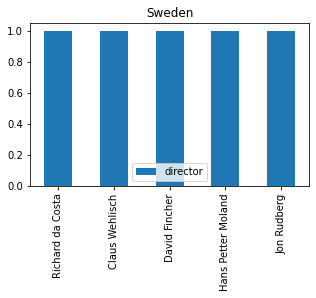

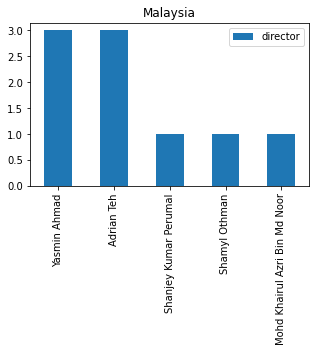

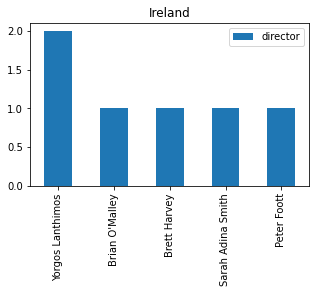

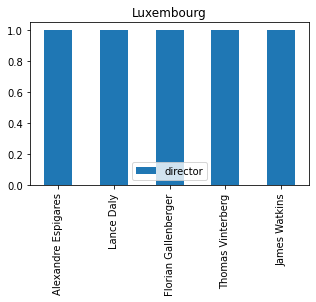

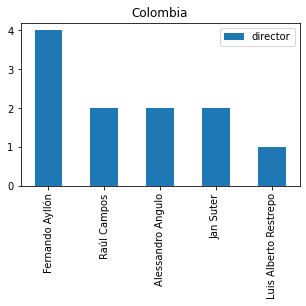

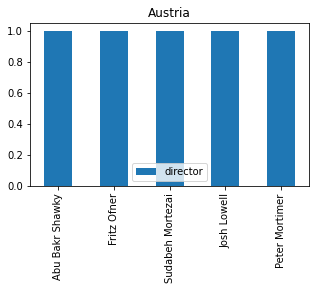

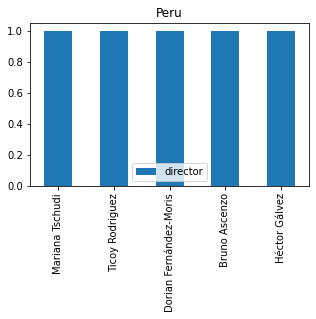

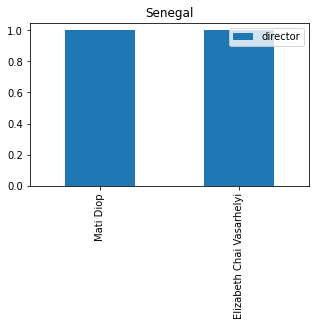

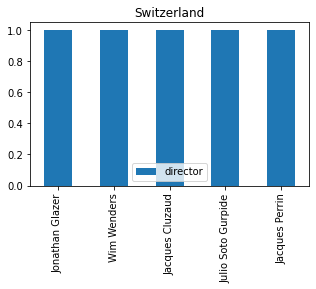

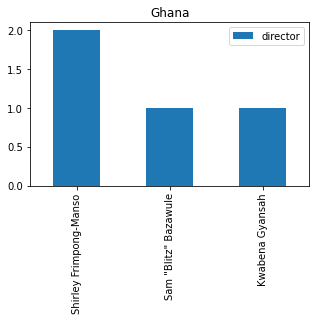

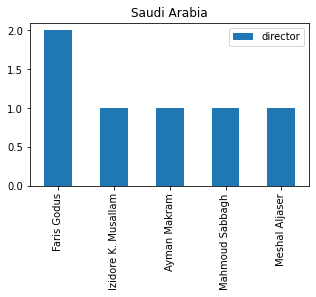

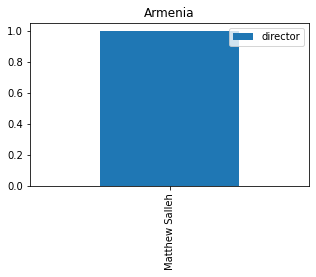

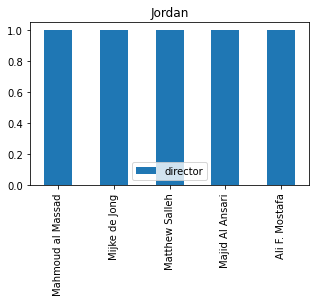

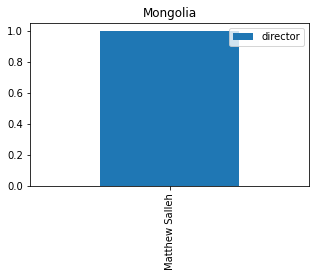

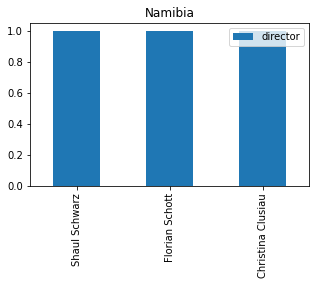

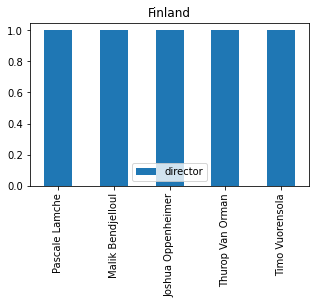

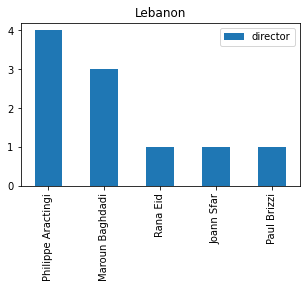

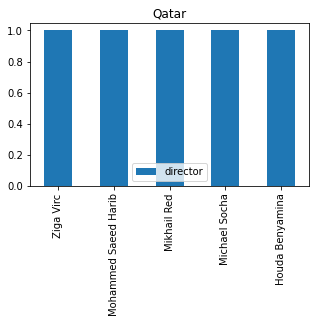

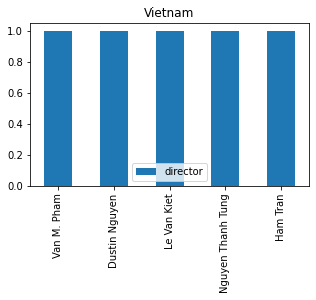

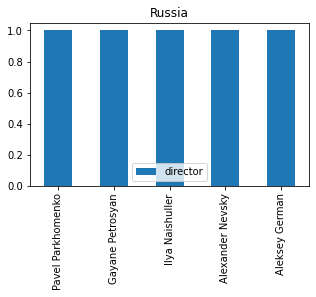

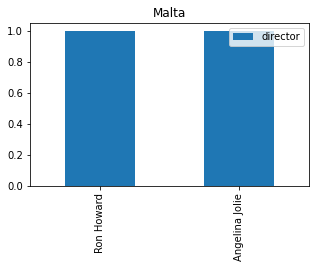

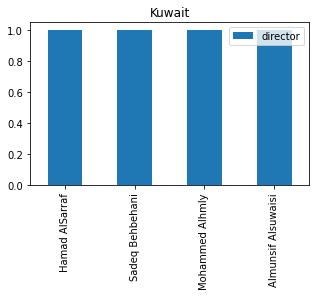

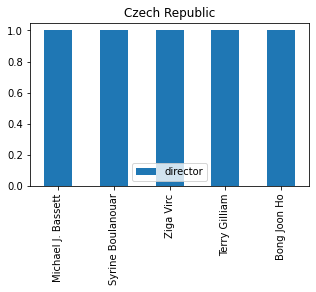

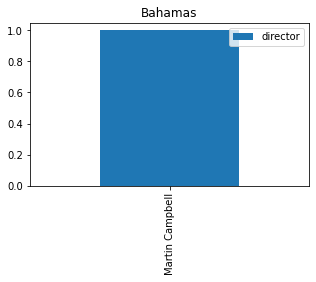

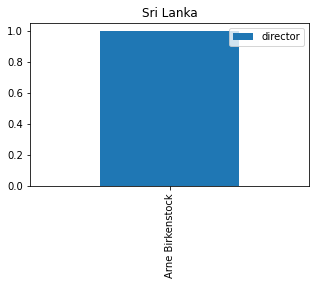

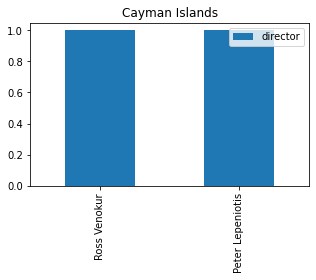

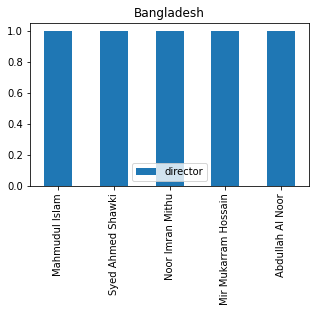

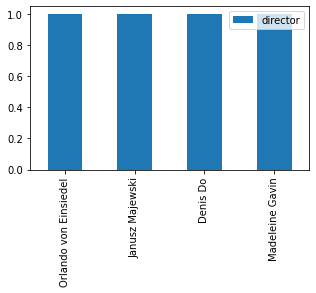

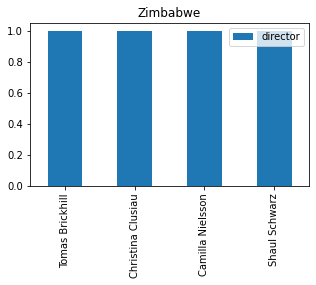

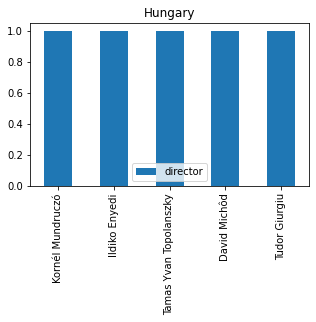

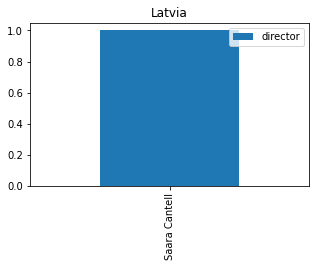

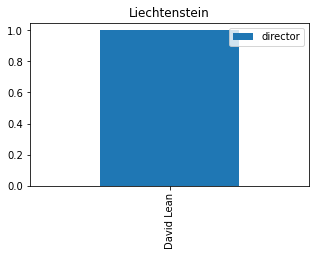

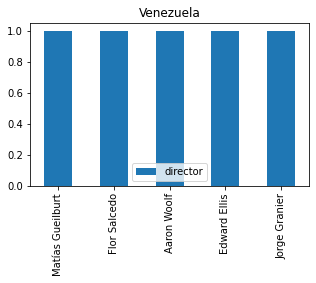

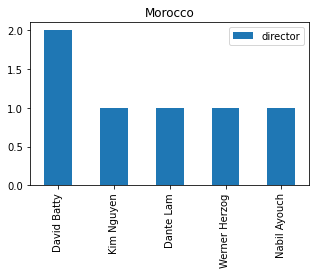

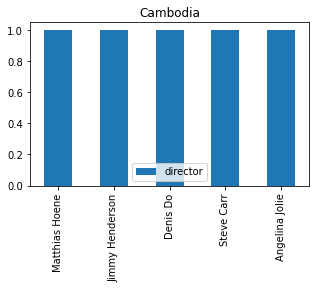

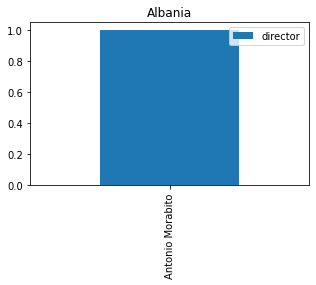

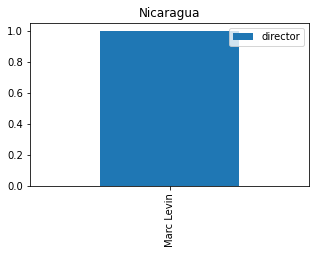

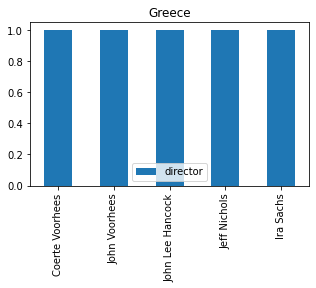

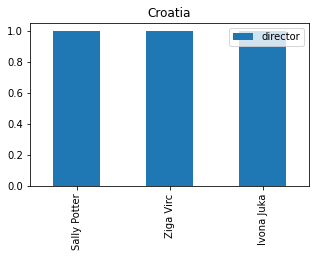

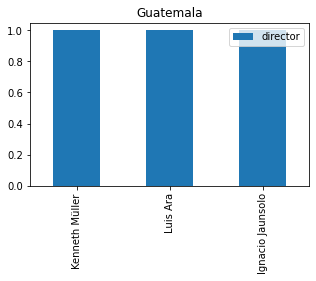

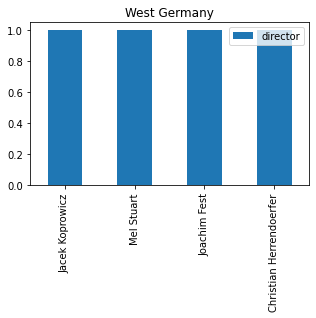

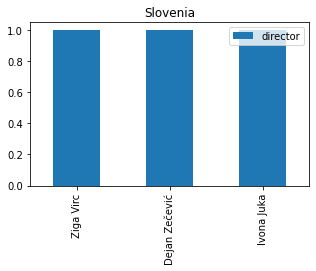

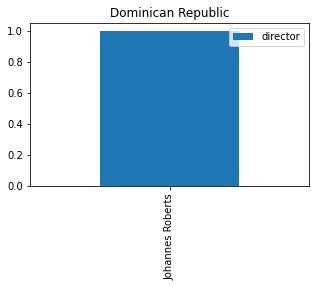

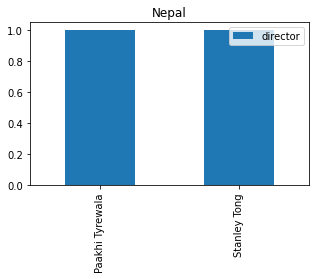

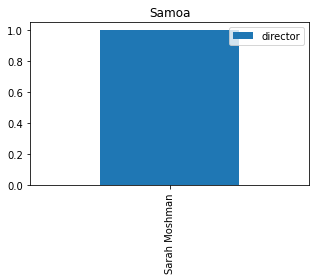

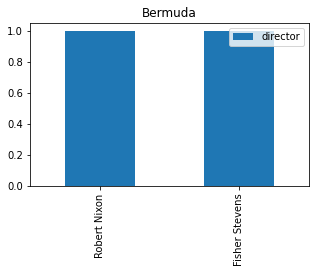

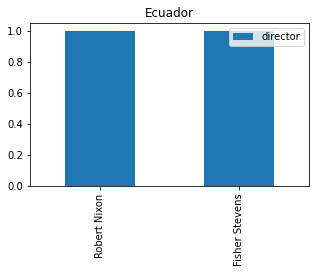

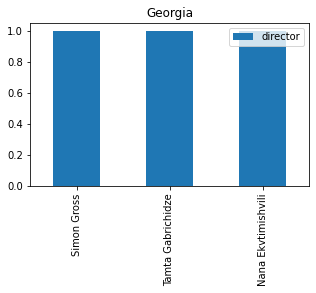

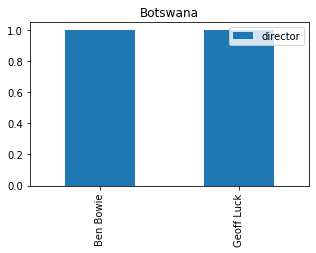

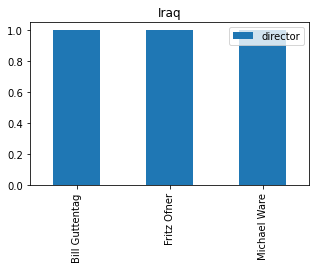

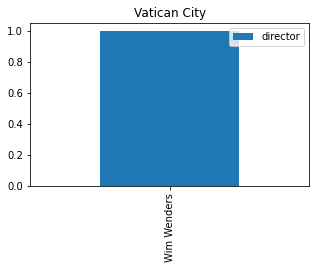

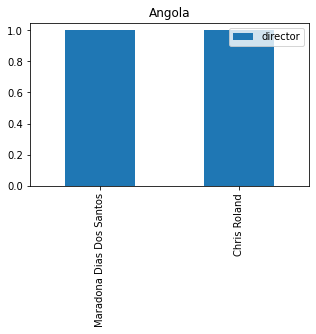

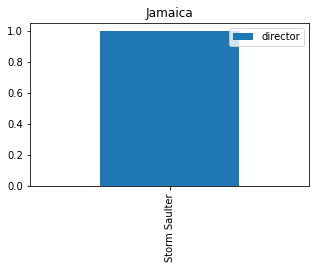

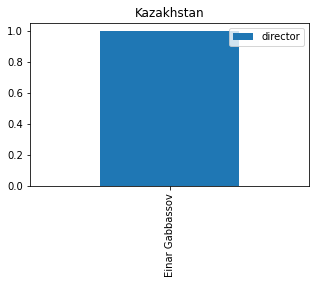

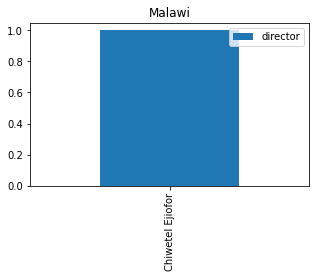

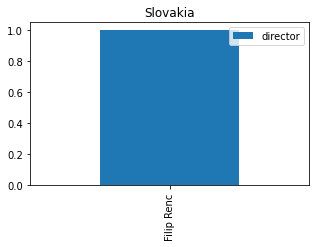

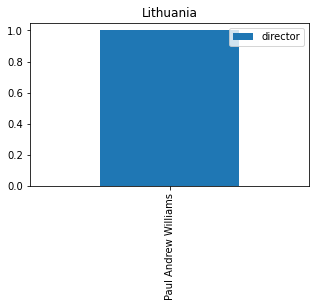

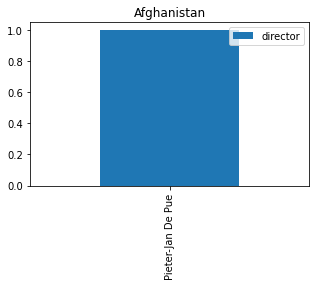

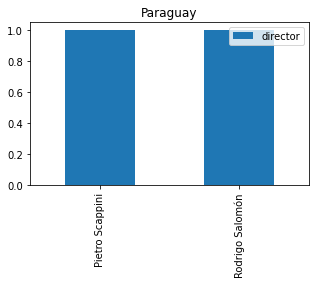

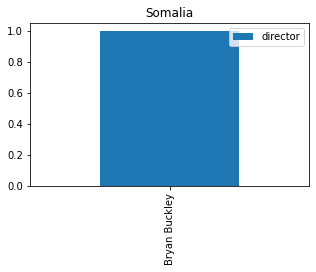

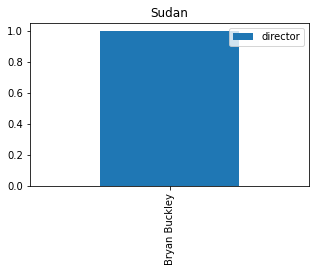

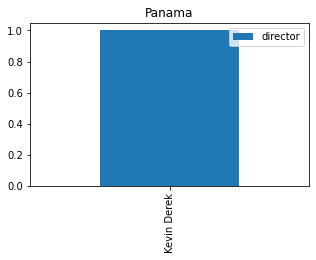

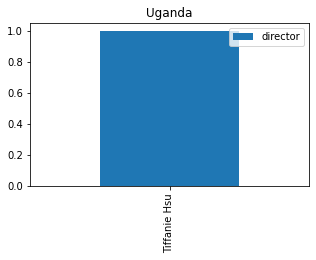

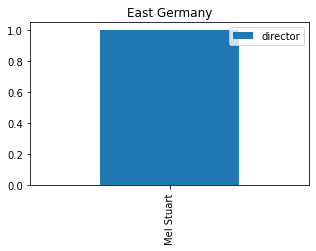

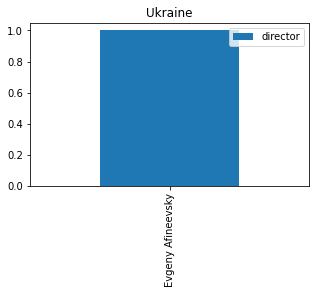

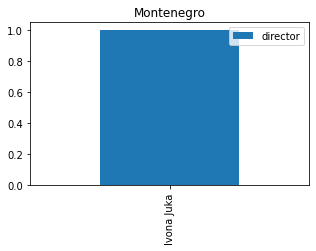

In [ ]:
# 9. Μελετηστε τους σκηνοθέτες ανά χώρα και παρουσιάστε σχετικά γραφήματα.
import matplotlib.pyplot as plt

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['country'], inplace=True)
df_netflix.dropna(subset = ['director'], inplace=True)
df_netflix.dropna(subset = ['show_id'], inplace=True)

#spase ta kelia pou uparxoun 2+ xwres me bash ta listed_in
DirectorNCountry_df = pd.DataFrame(df_netflix.country.str.replace(', ',',').str.split(',').tolist(), index=df_netflix.director).stack()

# kane reset ta ids sta nea rows kai kolla ta me ta listed_in
DirectorNCountry_df = DirectorNCountry_df.reset_index([0, 'director'])

# ftiakse to table
DirectorNCountry_df.columns = ['director','country']

#kane to idio gia ta director me bash tis xwres
DirectorNCountry_df = pd.DataFrame(DirectorNCountry_df.director.str.replace(', ',',').str.split(',').tolist(), index=DirectorNCountry_df.country).stack()
DirectorNCountry_df = DirectorNCountry_df.reset_index([0, 'country'])
DirectorNCountry_df.columns = ['country','director']


#lista me tis xwres
country_list = df_netflix.country
country_list = pd.DataFrame(country_list.str.replace(', ',',').str.split(',').tolist(), index=country_list).stack()
country_list = country_list.reset_index([0, 'country'])
del country_list['country']
country_list =country_list.drop_duplicates()
country_list.columns= ['country']

# gia kathe xwra ektypwse tou top 5 skhnothetes
for country in country_list.country:
  tmp_df = pd.DataFrame(data=DirectorNCountry_df.loc[DirectorNCountry_df['country'] == country, 'director'].value_counts().head(5))
  tmp_df.plot(kind='bar',figsize=(5,3),title= country)
  

**10. Μελετήστε τις σειρές και παρουσιάστε ένα γράφημα που τις δείχνει ανάλογα με το αριθμό των seasons.**

Πήραμε όλες τις σειρές και κρατήσαμε τις διάρκειές τους. Κάναμε γράφημα με τον αριθμό των σειρών που έχουν από μια season και πάνω.

Text(0, 0.5, 'TV Shows')

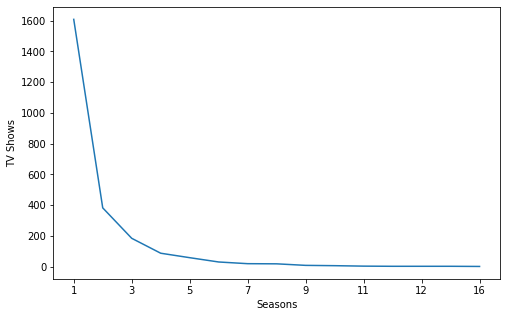

In [ ]:
# 10. Μελετήστε τις σειρές και παρουσιάστε ένα γράφημα που τις δείχνει ανάλογα με το αριθμό των seasons.


path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)

#Drop rows with nan values
df_netflix.dropna(subset = ['type'], inplace=True)
df_netflix.dropna(subset = ['duration'], inplace=True)
df_netflix.dropna(subset = ['duration'], inplace=True)

#neo df
type_title_duration_df = df_netflix[['type','title','duration']]
df_show = type_title_duration_df[type_title_duration_df['type'] == 'TV Show']
del df_show['type']

#neo df mono gia series
df_show = pd.DataFrame(df_show.duration.str.split(' ').tolist(), index=df_show.title).stack()
df_show = df_show.reset_index([0, 'title'])
df_show.columns = ['title','duration']

#katharizoume oti den xreiazomaste
df_show = df_show[df_show['duration'] != 'Season']
df_show = df_show[df_show['duration'] != 'Seasons']

#plot
ax =df_show.duration.value_counts().sort_values(ascending= False).plot(figsize=(8,5))
ax.set_xlabel("Seasons")
ax.set_ylabel("TV Shows")

**11. Αξιοποιήστε τα υπόλοιπα αρχεία της εργασίας για να απαντήσετε στο ερώτημα: Ποιές είναι οι ταινίες με την πιο υψηλή βαθμολογία;Θα χρειαστεί να συννενώσετε κατάλληλα τα αρχεία που σας δίνονται ώστε να κρατήσετε τις ταινίες του netflix για τις οποίες υπάρχουν ratings στο IMBD.**

Ενώσαμε τα IMDb_ratings με τα IMDb_movies και κρατήσαμε μόνο τις στήλες που θέλαμε. Μετά ενώσαμε το αποτέλεσμα του παραπάνω με το netflix και κρατήσαμε μόνο τις ταινίες. Τέλος κάναμε sort ανάλογα με την μεγαλύτερη βαθμολογία.

In [ ]:
# 11. Ποιές είναι οι ταινίες με την πιο υψηλή βαθμολογία

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
path_IMDb_movies = '/content/gdrive/MyDrive/TEDE/ask1/IMDb movies.csv'
path_IMDb_ratings = '/content/gdrive/MyDrive/TEDE/ask1/IMDb ratings.csv'
df_netflix = pd.read_csv(path_netflix)
df_IMDb_movies = pd.read_csv(path_IMDb_movies)
df_IMDb_ratings = pd.read_csv(path_IMDb_ratings)

#join IMDb_movies kai IMDb_ratings kai drop ta columns pou den theloume
merged_df =pd.DataFrame(df_IMDb_movies.join(df_IMDb_ratings.set_index('imdb_title_id'), on='imdb_title_id'))
merged_df=merged_df.drop(['original_title','year','date_published','genre', 'duration','language', 'writer','production_company', 'actors', 'description','budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore','reviews_from_users', 'reviews_from_critics','mean_vote', 'median_vote', 'votes_10', 'votes_9','votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3','votes_2', 'votes_1', 'allgenders_0age_avg_vote','allgenders_0age_votes', 'allgenders_18age_avg_vote','allgenders_18age_votes', 'allgenders_30age_avg_vote','allgenders_30age_votes', 'allgenders_45age_avg_vote','allgenders_45age_votes', 'males_allages_avg_vote','males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes','males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote','males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes','females_allages_avg_vote', 'females_allages_votes','females_0age_avg_vote', 'females_0age_votes', 'females_18age_avg_vote','females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes','females_45age_avg_vote', 'females_45age_votes','top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating','us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes','country','director'], axis=1)

# merge to apotelesma twn parapanw me netflix kai drop ta kena
merged_df = pd.DataFrame(df_netflix.join(merged_df.set_index('title'), on='title'))
merged_df.dropna(subset = ['avg_vote'], inplace=True)

#kratame mono ta movies kai diwxnoume columns pou den theloume
df_movies_only = merged_df[merged_df['type'] == 'Movie']
df_movies_only=df_movies_only.drop(['show_id','date_added','release_year','rating','duration','listed_in','description','avg_vote','votes'],axis=1)

#sort me vash tis perissoteres psifous
df_movies_only.sort_values(by='weighted_average_vote', ascending=False)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,type,title,director,cast,country,imdb_title_id,weighted_average_vote,total_votes
5002,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,tt0110912,8.9,1780147.0
5430,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,tt0108052,8.9,1183248.0
2979,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",tt1375666,8.8,2002816.0
1400,Movie,City of God,"Fernando Meirelles, Katia Lund","Alexandre Rodrigues, Leandro Firmino, Phellipe...","Brazil, France, Germany",tt0317248,8.6,685856.0
2463,Movie,Gol Maal,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,tt0079221,8.6,17381.0
...,...,...,...,...,...,...,...,...
3479,Movie,Kyaa Kool Hain Hum 3,Umesh Ghadge,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,tt5290620,1.9,4019.0
2743,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,tt2344678,1.7,7736.0
4862,Movie,Pink,Aniruddha Roy Chowdhury,"Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...",India,tt5525360,1.6,132.0
318,Movie,Aerials,S.A. Zaidi,"Saga Alyasery, Ana Druzhynina, Mansour Al Fele...",United Arab Emirates,tt5314138,1.6,221.0


# Δεύτερο Κομμάτι εργασίες. Ερωτήσεις 1-4


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
cols = ["description"]
df_netflix = pd.read_csv(path_netflix, usecols=cols)


**1.a. Δημιουργήστε το boolean BoW πίνακα των unigrams και των bigrams από τη κειμενική αναπαράσταση των ταινιών. (χρησιμοποιήστε την παράμετρο ngram_range του CountVectorizer).**

In [ ]:
#1.a

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)
df_netflix.dropna(subset = ['description'], inplace=True)


bow_vectorizer = CountVectorizer(ngram_range=(1,2), max_df = 0.03, min_df=0.005, stop_words='english', max_features=1000)
bow_xtrain = bow_vectorizer.fit_transform(df_netflix['description'])
cv_dataframe=pd.DataFrame(bow_xtrain.toarray(),columns=bow_vectorizer.get_feature_names())

**1.b. Δημιουργήστε τον TF-IDF (Term Frequency - InverseDocument Frequency)πίνακα των unigrams και των bigrams από τη κειμενική αναπαράσταση των ταινιών.**

In [ ]:
#1.b
path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)
df_netflix.dropna(subset = ['description'], inplace=True)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.005, max_df=0.03,max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(df_netflix['description'])
tf_dataframe = pd.DataFrame(tfidf.toarray(),columns = tfidf_vectorizer.get_feature_names())

**2.a. Για την αναπαράσταση από το 1.α, θα αξιοποιήσετε το Jaccard/Tanimoto coefficient για να υπολογίσετε την ομοιότητα 2 ταινιών δοθέντων των feature vectors τους**

In [ ]:
#2.a
pred = np.array(cv_dataframe)
jac_sim = 1 - pairwise_distances(pred, pred, metric='jaccard')
print(jac_sim)
print('len of array' ,len(jac_sim))

#ektupwnoyme ta index 
dictionary_for_jac = {}
key_jac = 0
for element in jac_sim:

  dictionary_for_jac[key_jac]= element.argsort()[-101:][::-1]
  key_jac +=1

#paradeigma
print('dictinary for key 2000 = \n',dictionary_for_jac[2000])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[[1.         0.         0.11111111 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.16666667 0.         0.        ]
 [0.11111111 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.16666667 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
len of array 7787
dictinary for key 2000 = 
 [2000  940 2734 1708 7408 5862 3516 5150 1574 1570 6470 6402 4286 4475
 3748 5933 3087 3497 2149 1325 1761  824 3552 2464 5164 5699 2578  340
  476 3499 6894 6873 1494 3401 2114  553 3599 3281 1363 2251  421 5698
 4799 7558 2431 3537 4224 2525 4896 6735 2591 1545 6921 6956  185 4874
 3447 7151 4284 5060 7161 6837 2293 1573 2796 6880 4324 1084 3525 1033
 4708 2422 5418 1656 6598 6405 4042  538  566 4252 7234 4406 3923 4062
 5330 3716 4302 1605 4758 2719 1341 2069 6966 5610 1464 4015 6464 3769
  228  715 251

**2.b. Για την αναπαράσταση από το 1.β, θα αξιοποιήσετε το cosine similarity.**

In [ ]:
#2.b
pred2 = np.array(tf_dataframe)
cos_sim = 1 - pairwise_distances(pred2, pred2, metric='cosine')
print(cos_sim)
print('len of array',len(cos_sim))

#ektupwnoume ta indexes
dictionary_for_cos = {}
key_cos = 0
for element in cos_sim:

  dictionary_for_cos[key_cos]= element.argsort()[-101:][::-1]
  key_cos +=1

#paradeigma
print('dictionary for key 2000 = \n',dictionary_for_cos[2000])

[[1.         0.         0.21487808 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.20693898 0.         0.        ]
 [0.21487808 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.20693898 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
len of array 7787
dictionary for key 2000 = 
 [2000 2734 5862  940 7408 1708 6470 3748 3552 1325 2149 5933 1570 5150
 1574 4286 3087 3497 6402 4475 4224 3516  824  185 2578 2251 3281 1363
 6921 3537 2525 2431 6873 6735 5164 5698 5699 3599 4874 2114  340  421
  553 3401 7558 4896 6894 6956  476 3499 1545 2591 2464 4799 3525 4042
 1573 4284 5418 2293 4252 6405 3923 7234 5330 6598 6880 4324 7161 1656
 1084 3447  566 5060 4062 4406 1033 7151 4302 6837  538 2510 2422 2796
 6464 1605 5610  715 7711  228 1341 2069 4066 2667 2185 3716 6966 3769
 2719 4758 74

**3. Πρόβλεψη (1): Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο ένα τίτλο,ένα ακέραιο αριθμό N και τον τρόπο εύρεσης της ομοιότητας(boolean ή tf-idf σύμφωνα με τα 1,2) και επιστρέφει τους Ν πιο όμοιους τίτλους.**

In [ ]:
#3

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)
df_netflix.dropna(subset = ['title'], inplace=True)


def get_similar_movies(title,N=10,method='boolean'):
  if method == 'boolean':
    for ind in range(1, N+1):
      print(df_netflix['title'].values[dictionary_for_jac[np.where(df_netflix['title']== title)[0][0]][ind]])
  elif method == 'tf-idf':
    for ind in range(1, N+1):
      print(df_netflix['title'].values[dictionary_for_cos[np.where(df_netflix['title']== title)[0][0]][ind]])


get_similar_movies('13 Sins',N=10,method='boolean')
print('\n\n')

get_similar_movies('A Love Story',N=60,method='tf-idf')

Minute to Win It
Khubsoorat
Wild Alaska
Neruda
For the Win
Love & Anarchy
Awake: The Million Dollar Game
Busted!
The Chase
The Cincinnati Kid



Heart & Soul
The Perfect Picture: Ten Years Later
Freshman Year
Nymphomaniac: Volume 1
The Disastrous Life of Saiki K.: Reawakened
A Korean Odyssey
Emo the Musical
Cirque du Freak: The Vampire's Assistant
Pan's Labyrinth
Saving Capitalism
Popeye
The Good Catholic
Hayat Öpücügü
An Innocent Mistake
NOVA: Bird Brain
Chalay Thay Saath
Great Interior Design Challenge
Ask the Doctor
Addicted to Life
The Stanford Prison Experiment
My Week with Marilyn
Jimmy: The True Story of a True Idiot
DRAGON PILOT: Hisone & Masotan
Don Verdean
Enlighten Us
Darr Sabko Lagta Hai
Murphy's Law of Love
Inside Man: Most Wanted
Man Up
Behind the Newsroom
Hyperdrive
Hi Score Girl
Wheelman
Sometimes
Love Is War
Buddy Thunderstruck: The Maybe Pile
Lady Bird
Hati Perempuan
Chloe
NOVA: Secrets of the Shining Knight
Stray Bullet
LoveTrue
House Arrest
Verónica
Fittest in Dubai

**4.Πρόβλεψη (2): Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο μια ακολουθία από λέξεις (π.χ. Περιγραφή μιας ταινίας),ένα ακέραιο αριθμό N  και τον τρόπο εύρεσης της ομοιότητας και επιστρέφει τους Ν πιο όμοιους τίτλους με βάση αυτή τη περιγραφή.**

In [ ]:
#3

from sklearn.metrics import jaccard_score

path_netflix = '/content/gdrive/MyDrive/TEDE/ask1/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)
df_netflix.dropna(subset = ['title'], inplace=True)


def get_similar_movies2(description,N=10,method='boolean'):
  if method == 'boolean':
    bow_vectorizer_new = CountVectorizer(ngram_range=(1,2), max_df = 0.03, min_df=0.005, stop_words='english', max_features=1000)
    bow_xtrain_new = bow_vectorizer_new.fit_transform(df_netflix['description'])
    cv_dataframe_new=pd.DataFrame(bow_xtrain_new.toarray(),columns=bow_vectorizer_new.get_feature_names())

    features1 = bow_vectorizer_new.transform([description])
    new_array1 = 1 - pairwise_distances(features1.toarray(), bow_xtrain_new.toarray(), metric='jaccard')
    print(new_array1[0].argsort()[-N:][::-1])

  elif method == 'tf-idf':
    tfidf_vectorizer1 = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.005, max_df=0.03,max_features=1000)
    tfidf1 = tfidf_vectorizer1.fit_transform(df_netflix['description'])
    tf_dataframe = pd.DataFrame(tfidf1.toarray(),columns = tfidf_vectorizer1.get_feature_names())

    features2 =tfidf_vectorizer1.transform([description])
    new_array2 = 1 - pairwise_distances(features2.toarray(),tfidf1.toarray(), metric='cosine')
    print(new_array2[0].argsort()[-N:][::-1])

get_similar_movies2('War between America and Vietnam',N=20,method='boolean')
print('\n\n')

get_similar_movies2('War between America and Vietnam',N=60,method='tf-idf') 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[7115 7594 2521 4423 6551 1041  993 2487 5172 2129 3202 5806  607 5137
 7535 4960 6221 3134 6816 6699]



[4423 2521 7115 7594  993 1041 3134  607 2487 4960 6699 2689 2278 7459
 7613  139 7612 6551 4009 2129 7132 6816 1189  414 4529 2114 6221 5172
 7535 5137  485 3057 3202 3815 1326 5806 5252 5258 3532 3958 5413 3167
 2377 2961 6506 3230 6622 3484 2125 1865 3675 2698 6917 1787 3325 6571
 1828 2298  248 7412]
